In [13]:
# import packages 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 

from scipy import stats
import statsmodels.api as sm


import seaborn as sns 


# 1. Overview of the Data 


In [14]:
# read csv file 

heart_df = pd.read_csv("cardio_train.csv", delimiter =";")


heart_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [15]:
heart_df.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
heart_df.shape

(70000, 13)

<div class="alert alert-block alert-info">

Befor we delve into the data here is a quick overview of what we are going to be dealing with. 

This data set about peoples cardiovascular health and it contains 13 features as listed below. 

`id (int):` the patient's number.

`age (int - days):` the patient's age in days.

`gender (categorical code):` 1: women, 2: man.

`height (int - cm):` height of the patient.

`weight (float - kg):` weight of the patient.

`ap_hi (int):` Systolic blood pressure

`ap_lo (int):` Diastolic blood pressure

`cholesterol (categorical code):` Cholesterol level - 1: normal, 2: above normal, 3: well above normal 

`gluc (categorical code):` Glucose level - 1: normal, 2: above normal, 3: well above normal 

`smoke (binary):` Whether patient smokes or not - 0: Doesn't smoke, 1: Smokes

`alco (binary):` Whether patient takes alcohol or not - 0: Doesn't drink, 1: Drinks 

`active (binary):` Whether patient does physical activity (PE) - 0: Doesn't do PE, 1: Does PE

`cardio (binary):` Presence or absence of cardiovascular disease - 0: Presence of cardiovascular disease, 1: Absence of cardiovascular disease 



</div>

In [17]:
heart_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<div class="alert alert-block alert-info">

| Column Name       | Description                                                   | Data Type     |
| ----------------- | ------------------------------------------------------------- | ------------- |
| id                | Subject's id number                                           | int           |
| age               | Subject's age in days                                         | int           |
| gender            | Subject's gender (categorical code)                           | int           | 
| height            | Subject's height in cm                                        | int           |
| weight            | Subject's weight in kg                                        | float         |
| ap_hi             | Subject's Systolic blood pressure                             | int           |
| ap_lo             | Subject's Diastolic blood pressure                            | int           |
| cholesterol       | Subject's Cholesterol level (categorical code)                | int           |
| gluc              | Subject's Glucose level (categorical code)                    | int           |
| smoke             | Whether subject smokes or not (binary value)                  | int           | 
| alco              | Whether subject drinks or not (binary value)                  | int           |
| active            | Whether subject does PE or not (binary value)                 | int           |
| cardio            | Presence or absence of cardiovascular disease (binary value)  | int           |                          





</div>

##### There is no missing value in this data set.

# 2. Fix Data 



#### Change the subject's age from days to years 


In [18]:
average_days_per_year = 365.25

heart_df['age'] = (heart_df['age']/ average_days_per_year).round().astype(int)

heart_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [19]:
heart_df["bmi"] = (heart_df["weight"]/((heart_df["height"]/100) **2)).round(2)

heart_df.pop('id')
heart_df.pop('height')
heart_df.pop('weight')

heart_df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.97
1,55,1,140,90,3,1,0,0,1,1,34.93
2,52,1,130,70,3,1,0,0,0,1,23.51
3,48,2,150,100,1,1,0,0,1,1,28.71
4,48,1,100,60,1,1,0,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,120,80,1,1,1,0,1,0,26.93
69996,62,1,140,90,2,2,0,0,1,1,50.47
69997,52,2,180,90,3,1,0,1,0,1,31.35
69998,61,1,135,80,1,2,0,0,0,1,27.10


In [20]:
heart_df= heart_df[["age",
                    "gender",
                    "bmi",
                    "ap_hi",
                    "ap_lo",
                    "cholesterol",
                    "gluc",
                    "smoke",
                    "alco",
                    "active",
                    "cardio"]]
heart_df

,age,gender,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,21.97,110,80,1,1,0,0,1,0
1,55,1,34.93,140,90,3,1,0,0,1,1
2,52,1,23.51,130,70,3,1,0,0,0,1
3,48,2,28.71,150,100,1,1,0,0,1,1
4,48,1,23.01,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,26.93,120,80,1,1,1,0,1,0
69996,62,1,50.47,140,90,2,2,0,0,1,1
69997,52,2,31.35,180,90,3,1,0,1,0,1
69998,61,1,27.10,135,80,1,2,0,0,0,1


In [21]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   bmi          70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cholesterol  70000 non-null  int64  
 6   gluc         70000 non-null  int64  
 7   smoke        70000 non-null  int64  
 8   alco         70000 non-null  int64  
 9   active       70000 non-null  int64  
 10  cardio       70000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 5.9 MB


<div class="alert alert-block alert-info">

| Column Name                           | Description                                                   | Field Name                    |Data Type     |
| ------------------------------------- | ------------------------------------------------------------- | ----------------------------- |------------- |
| Age                                   | Subject's age in days                                         | age                           |int           |
| Gender                                | Subject's gender (categorical code)                           | gender                        |int           | 
| BMI                                   | Subject's BMI                                                 | -                             |float64       |
| Systolic blood pressure               | Subject's Systolic blood pressure                             | ap_hi                         |int           |
| Diastolic blood pressure              | Subject's Diastolic blood pressure                            | ap_lo                         |int           |
| Cholesterol                           | Subject's Cholesterol level (categorical code)                | cholesterol                   |int           |
| Glucose                               | Subject's Glucose level (categorical code)                    | gluc                          |int           |
| Smoke                                 | Whether subject smokes or not (binary value)                  | smoke                         |int           | 
| Alcohol                               | Whether subject drinks or not (binary value)                  | alco                          |int           |    
| Physical activity                     | Whether subject does PE or not (binary value)                 | active                        |int           |
| Cardiovascular disease                | Presence or absence of cardiovascular disease (binary value)  | cardio                        |int           |                          




</div>

In [22]:
heart_df = heart_df.rename(columns={
                    "age": "Age",
                    "gender": "Gender",
                    "bmi": "BMI",
                    "ap_hi": "Systolic blood pressure",
                    "ap_lo": "Diastolic blood pressure",
                    "cholesterol": "Cholesterol",
                    "gluc": "Glucose",
                    "smoke": "Smoke",
                    "alco": "Alcohol",
                    "active": "Physical activity",
                    "cardio": "Cardiovascular disease"
})

Something I realized while doing the EDA is that some of the values in `ap_hi` and `ap_lo` are completly meaningless, so I will remove those rows from the dataframe 

In [23]:
data_drop1 = ((heart_df['Systolic blood pressure'] > 250) | (heart_df["Diastolic blood pressure"] > 200))
heart_df = heart_df[~data_drop1]

data_drop2 = ((heart_df['Systolic blood pressure'] < 25) | (heart_df["Diastolic blood pressure"] < 20))
heart_df = heart_df[~data_drop2]




In [24]:
len(heart_df)

68795

In [25]:
# change some the the categorical variables
mappings = {
    'Gender': {
        1: "Female",
        2: "Male"},
    'Cholesterol': {
        1: "Normal",
        2: "Above Normal",
        3: "Well Above Normal"},
    'Glucose': {
        1: "Normal",
        2: "Above Normal",
        3: "Well Above Normal"},
    'Smoke': {
        0: "Non-smoker",
        1: "Smoker"},
    'Alcohol': {
        0: "Non-drinker",
        1: "Drinker"},
    'Physical activity': {
        0: "Non-active",
        1: "Active"},
    'Cardiovascular disease': {
        0: "No Disease",
        1: "Heart Disease"}
}



In [26]:
analysis_df = heart_df.copy()
analysis_df

,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,50,2,21.97,110,80,1,1,0,0,1,0
1,55,1,34.93,140,90,3,1,0,0,1,1
2,52,1,23.51,130,70,3,1,0,0,0,1
3,48,2,28.71,150,100,1,1,0,0,1,1
4,48,1,23.01,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,26.93,120,80,1,1,1,0,1,0
69996,62,1,50.47,140,90,2,2,0,0,1,1
69997,52,2,31.35,180,90,3,1,0,1,0,1
69998,61,1,27.10,135,80,1,2,0,0,0,1


In [27]:
def map_values(x, mapping):
    return mapping.get(x,x)

for feature, mapping in mappings.items():
    analysis_df[feature] = analysis_df[feature].map(lambda x: map_values(x, mapping))
    analysis_df[feature] = analysis_df[feature].astype(object)

In [28]:
analysis_df

,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,50,Male,21.97,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No Disease
1,55,Female,34.93,140,90,Well Above Normal,Normal,Non-smoker,Non-drinker,Active,Heart Disease
2,52,Female,23.51,130,70,Well Above Normal,Normal,Non-smoker,Non-drinker,Non-active,Heart Disease
3,48,Male,28.71,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,Heart Disease
4,48,Female,23.01,100,60,Normal,Normal,Non-smoker,Non-drinker,Non-active,No Disease
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,Male,26.93,120,80,Normal,Normal,Smoker,Non-drinker,Active,No Disease
69996,62,Female,50.47,140,90,Above Normal,Above Normal,Non-smoker,Non-drinker,Active,Heart Disease
69997,52,Male,31.35,180,90,Well Above Normal,Normal,Non-smoker,Drinker,Non-active,Heart Disease
69998,61,Female,27.10,135,80,Normal,Above Normal,Non-smoker,Non-drinker,Non-active,Heart Disease


#### Change categorical data type into categorical


In [29]:
# Categorical variables
heart_df[['Gender', 'Cholesterol', 'Glucose']] = heart_df[['Gender', 'Cholesterol', 'Glucose']].astype('category')

# Boolean variables
heart_df[['Smoke', 'Alcohol', 'Physical activity', 'Cardiovascular disease']] = heart_df[['Smoke', 'Alcohol', 'Physical activity', 'Cardiovascular disease']].astype('boolean')


heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68795 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       68795 non-null  int64   
 1   Gender                    68795 non-null  category
 2   BMI                       68795 non-null  float64 
 3   Systolic blood pressure   68795 non-null  int64   
 4   Diastolic blood pressure  68795 non-null  int64   
 5   Cholesterol               68795 non-null  category
 6   Glucose                   68795 non-null  category
 7   Smoke                     68795 non-null  boolean 
 8   Alcohol                   68795 non-null  boolean 
 9   Physical activity         68795 non-null  boolean 
 10  Cardiovascular disease    68795 non-null  boolean 
dtypes: boolean(4), category(3), float64(1), int64(3)
memory usage: 3.3 MB


<div class="alert alert-block alert-info">

| Column Name                           | Description                                                   | Field Name                    |Data Type     |
| ------------------------------------- | ------------------------------------------------------------- | ----------------------------- |------------- |
| Age                                   | Subject's age in days                                         | age                           |int           |
| Gender                                | Subject's gender (categorical code)                           | gender                        |category      | 
| BMI                                   | Subject's BMI                                                 | -                             |float64       |
| Systolic blood pressure               | Subject's Systolic blood pressure                             | ap_hi                         |int           |
| Diastolic blood pressure              | Subject's Diastolic blood pressure                            | ap_lo                         |int           |
| Cholesterol                           | Subject's Cholesterol level (categorical code)                | cholesterol                   |category      |
| Glucose                               | Subject's Glucose level (categorical code)                    | gluc                          |category      |
| Smoke                                 | Whether subject smokes or not (binary value)                  | smoke                         |boolean       | 
| Alcohol                               | Whether subject drinks or not (binary value)                  | alco                          |boolean       |
| Physical activity                     | Whether subject does PE or not (binary value)                 | active                        |boolean       |
| Cardiovascular disease                | Presence or absence of cardiovascular disease (binary value)  | cardio                        |boolean       |                          




</div>

In [30]:
heart_df.head()

,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,50,2,21.97,110,80,1,1,False,False,True,False
1,55,1,34.93,140,90,3,1,False,False,True,True
2,52,1,23.51,130,70,3,1,False,False,False,True
3,48,2,28.71,150,100,1,1,False,False,True,True
4,48,1,23.01,100,60,1,1,False,False,False,False


After taking an initial look at the data some of the values are out of range in `ap_hi` and `ap_lo`

# 3. Explore Variables 


In [31]:
stats_heart_df = heart_df.copy()
stats_heart_df

,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,50,2,21.97,110,80,1,1,False,False,True,False
1,55,1,34.93,140,90,3,1,False,False,True,True
2,52,1,23.51,130,70,3,1,False,False,False,True
3,48,2,28.71,150,100,1,1,False,False,True,True
4,48,1,23.01,100,60,1,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,26.93,120,80,1,1,True,False,True,False
69996,62,1,50.47,140,90,2,2,False,False,True,True
69997,52,2,31.35,180,90,3,1,False,True,False,True
69998,61,1,27.10,135,80,1,2,False,False,False,True


In [32]:
stats_heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,68795.0,53.290908,6.762284,30.00,48.00,54.00,58.00,65.00
BMI,68795.0,27.522523,6.049797,3.47,23.88,26.35,30.12,298.67
Systolic blood pressure,68795.0,126.614347,16.763961,60.00,120.00,120.00,140.00,240.00
Diastolic blood pressure,68795.0,81.365070,9.726854,20.00,80.00,80.00,90.00,190.00


In [33]:
stats_heart_df.dtypes

Age                            int64
Gender                      category
BMI                          float64
Systolic blood pressure        int64
Diastolic blood pressure       int64
Cholesterol                 category
Glucose                     category
Smoke                        boolean
Alcohol                      boolean
Physical activity            boolean
Cardiovascular disease       boolean
dtype: object

In [34]:
def hist_box_plots(feature):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,7))


    mean_value = heart_df[feature].mean()

    ax[0].hist(heart_df[feature], color = "#9463de")
    ax[0].set_xlabel(feature)
    ax[0].axvline(mean_value, color = 'black', linestyle = '--', linewidth = 1.5)
    ax[0].set_ylabel("Frequency")
    ax[0].set_title(f"{feature} Distribution")

    ax[1].boxplot(heart_df[feature], vert = False)
    ax[1].set_xlabel(feature)
    ax[1].set_yticklabels('')
    ax[1].set_title(f"{feature} Distribution")
    ax[1].tick_params(axis='y', length = 0 )

    plt.show()

In [35]:
def bar_donut_chart(feature):

    colors = ["#9463de", "#c991fe", "#d7afff", "#e6d1ff"]

    category_counts =  analysis_df[feature].value_counts()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

    bars = ax[0].barh(category_counts.index, category_counts.values, color = colors)

    for bar, value in zip(bars,category_counts.values):
        width = bar.get_width()
        ax[0].text(width, bar.get_y() + bar.get_height()/2, '%d' % int(width),
                   ha= 'left', va='center', color='black')

    ax[0].set_xlabel(feature)
    ax[0].set_ylabel("Count")
    ax[0].set_title(f"{feature} Distribution")
    ax[0].spines["top"].set_visible(False)
    ax[0].spines["right"].set_visible(False)


    ax[1].pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%', startangle = 140, colors = colors)
    


    plt.tight_layout()
    plt.show()


    
    

In [36]:
def statistical_summary(feature):

    print(f'Statistical summary for the variable {feature}: \n{heart_df[feature].describe()}\n')
    

def quantiles(feature):
    age_quantiles = heart_df[feature].quantile([0.0, 0.25, 0.50, 0.75, 0.9, 0.99, 1])
    print(f'Quantiles for the variable {feature}:\n{age_quantiles}')
    

In [37]:
# Find outliers using IOR method 
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]

    return outliers, lower_bound, upper_bound 

In [38]:
outliers = {}

In [39]:
#find skewness of each independent variable 

def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0: 
        print("The distribution is right-skewed")
    elif skewness < 0: 
        print("The distribution is left-skewed")
    else:
        print("The distribution is approximately symmetric")
    

### Univariate Analysis


#### Age

In [40]:
statistical_summary("Age")
quantiles("Age")

Statistical summary for the variable Age: 
count    68795.000000
mean        53.290908
std          6.762284
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: Age, dtype: float64

Quantiles for the variable Age:
0.00    30.0
0.25    48.0
0.50    54.0
0.75    58.0
0.90    62.0
0.99    64.0
1.00    65.0
Name: Age, dtype: float64


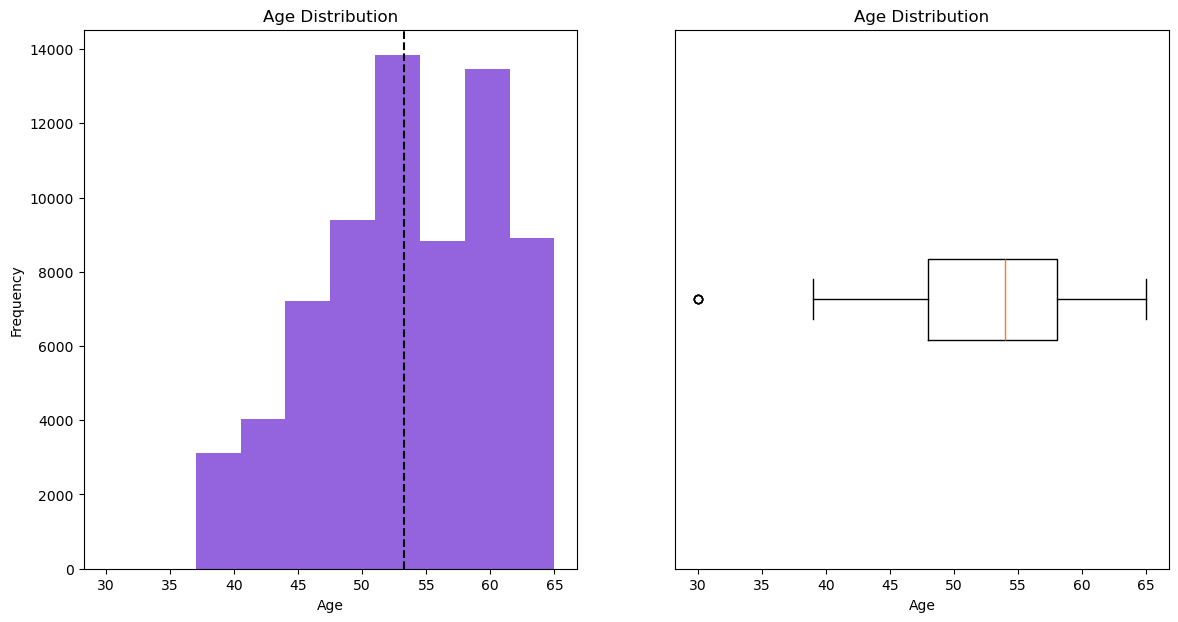

In [41]:
hist_box_plots("Age")

From the data we see that there is one outlier and that is patients at the age of 30 

In [42]:
heart_df[heart_df['Age'] == 30]


,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
6219,30,1,19.27,120,80,1,1,False,False,True,False
22343,30,2,30.04,100,60,1,1,False,False,True,False
30666,30,1,23.34,120,80,1,1,False,False,True,False
55905,30,1,23.05,110,70,1,1,False,False,True,False


In [43]:
age_outliers, age_lower_bound, age_higher_bound = find_outliers(analysis_df['Age'])

print("Lower Bound:", age_lower_bound)
print("Upper Bound:",  age_higher_bound)
print("Outlier:", len(age_outliers))





Lower Bound: 33.0
Upper Bound: 73.0
Outlier: 4


In [44]:
outliers.update({"Age" :len(age_outliers)})

In [45]:
outliers

{'Age': 4}

In [46]:
skewness_dist(stats_heart_df, "Age")

Skewness of the Age variable: -0.305
The distribution is left-skewed


### Grouping Age Feature 

In [47]:
#29-34 = 0 (Adult Young)
#35-40 = 1 (Adult Old)
#41-50 = 2 (Middle Age Young)
#51-59 = 3 (Middle Age Old)
#60< = 4 (Senior)

stats_heart_df.loc[(stats_heart_df['Age'] >= 29) & (stats_heart_df['Age'] < 35), "Age"] = 0
stats_heart_df.loc[(stats_heart_df['Age'] >= 35) & (stats_heart_df['Age'] < 41), "Age"] = 1 
stats_heart_df.loc[(stats_heart_df['Age'] >= 41) & (stats_heart_df['Age'] < 51), "Age"] = 2 
stats_heart_df.loc[(stats_heart_df['Age'] >= 51) & (stats_heart_df['Age'] < 60), "Age"] = 3
stats_heart_df.loc[(stats_heart_df['Age'] >= 60), "Age"] = 4 

stats_heart_df


,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,2,2,21.97,110,80,1,1,False,False,True,False
1,3,1,34.93,140,90,3,1,False,False,True,True
2,3,1,23.51,130,70,3,1,False,False,False,True
3,2,2,28.71,150,100,1,1,False,False,True,True
4,2,1,23.01,100,60,1,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
69995,3,2,26.93,120,80,1,1,True,False,True,False
69996,4,1,50.47,140,90,2,2,False,False,True,True
69997,3,2,31.35,180,90,3,1,False,True,False,True
69998,4,1,27.10,135,80,1,2,False,False,False,True


#### Gender 

In [48]:
statistical_summary("Gender")

Statistical summary for the variable Gender: 
count     68795
unique        2
top           1
freq      44804
Name: Gender, dtype: int64



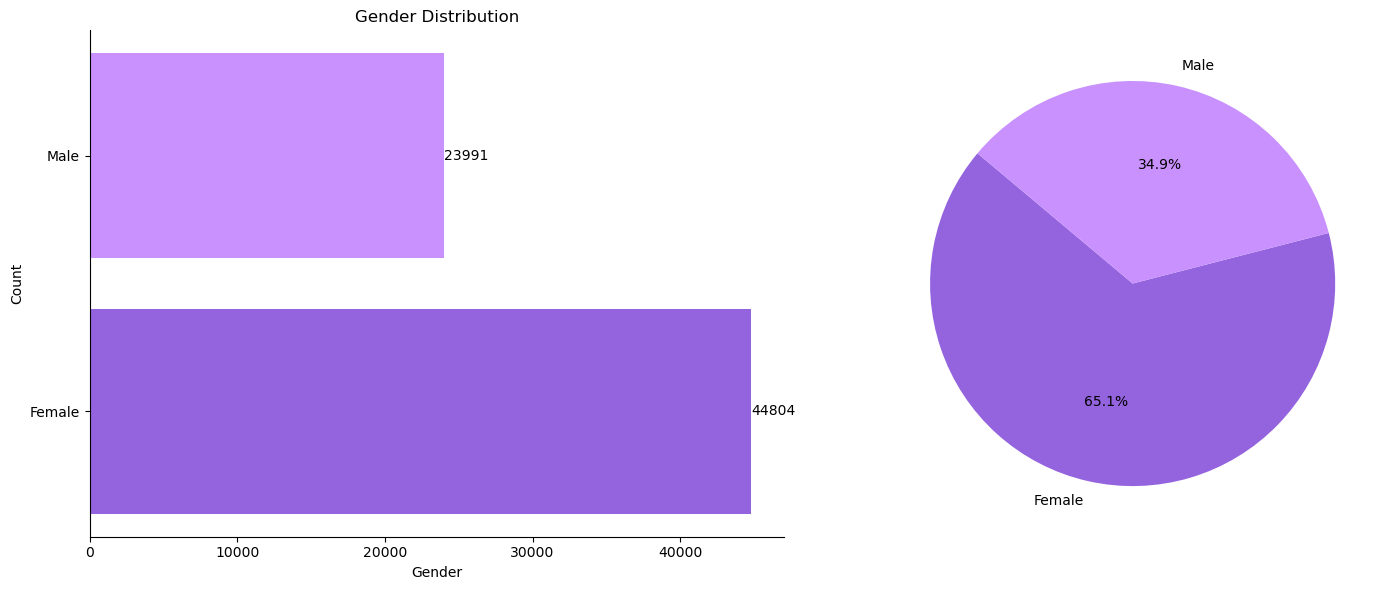

In [49]:
bar_donut_chart("Gender")

Note:

More women than men die of heart disease every year. Yet treatment for women is regularly delayed and their conditions are often misdiagnosed. “Heart disease is the No. 1 killer of women,” says Nisha Jhalani, MD, a cardiovascular disease specialist at the Vagelos College of Physicians and Surgeons

link: https://www.columbiadoctors.org/news/heart-disease-women-not-heart-disease-men#:~:text=More%20women%20than%20men%20die,their%20conditions%20are%20often%20misdiagnosed.&text=%E2%80%9CHeart%20disease%20is%20the%20No,College%20of%20Physicians%20and%20Surgeons.

#### BMI 


In [50]:
statistical_summary("BMI")

quantiles("BMI")

Statistical summary for the variable BMI: 
count    68795.000000
mean        27.522523
std          6.049797
min          3.470000
25%         23.880000
50%         26.350000
75%         30.120000
max        298.670000
Name: BMI, dtype: float64

Quantiles for the variable BMI:
0.00      3.4700
0.25     23.8800
0.50     26.3500
0.75     30.1200
0.90     34.4500
0.99     44.2706
1.00    298.6700
Name: BMI, dtype: float64


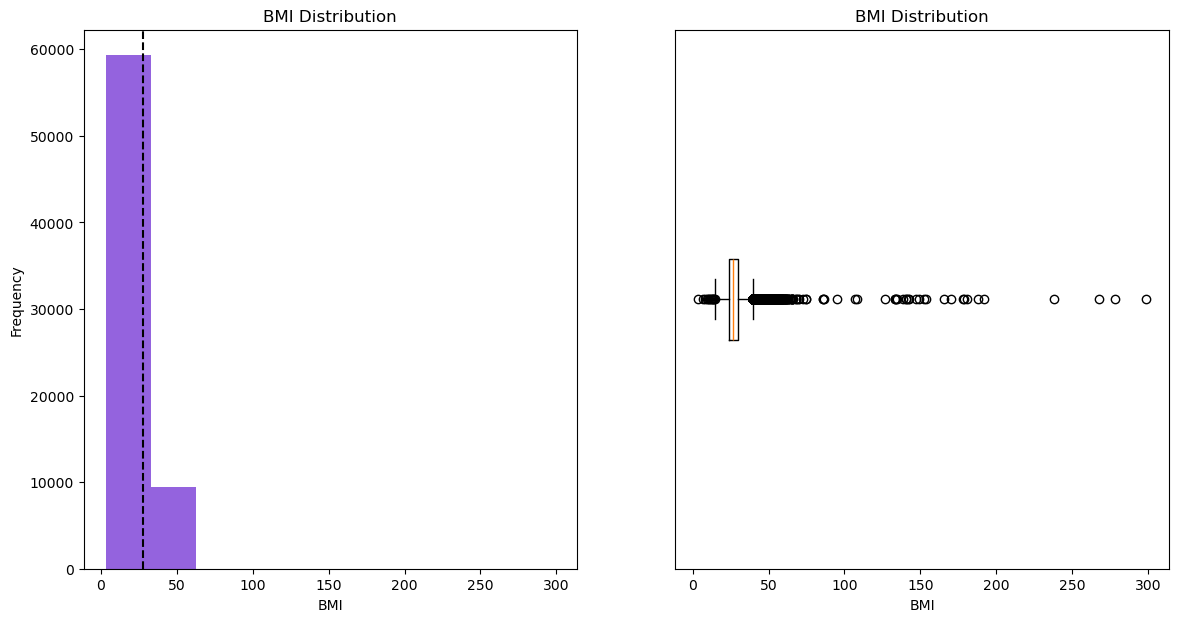

In [51]:
hist_box_plots("BMI")

In [52]:
bmi_outliers, bmi_lower_bound, bmi_higher_bound = find_outliers(analysis_df['BMI'])

print("Lower Bound:", bmi_lower_bound)
print("Upper Bound:",  bmi_higher_bound)
print("Outlier:", len(bmi_outliers))

outliers.update({"Age":len(bmi_outliers)})

Lower Bound: 14.519999999999996
Upper Bound: 39.480000000000004
Outlier: 2028


In [53]:
outliers.update({"BMI": len(bmi_outliers)})

In [54]:
outliers

{'Age': 2028, 'BMI': 2028}

In [55]:
skewness_dist(analysis_df, "BMI")

Skewness of the BMI variable: 7.787
The distribution is right-skewed


### Grouping BMI

In [56]:
#<16 = 0 (Severe Thinness)
#16-18.5 = 1 (Underweight)
#18.5-25 = 2 (Normal range)
#25-30 = 3 (Pre-obese)
#30-35 = 4 (Obese (Class I))
#35-40 = 5 (Obese (Class II))
#40< = 6 (Obese (Class III))

stats_heart_df.loc[(stats_heart_df["BMI"] < 16), "BMI"] = 0
stats_heart_df.loc[(stats_heart_df["BMI"] >= 16) & (stats_heart_df["BMI"] < 18.5), "BMI"] = 1
stats_heart_df.loc[(stats_heart_df["BMI"] >= 18.5) & (stats_heart_df["BMI"] < 25), "BMI"] = 2
stats_heart_df.loc[(stats_heart_df["BMI"] >= 25) & (stats_heart_df["BMI"] < 30), "BMI"] = 3
stats_heart_df.loc[(stats_heart_df["BMI"] >= 30) & (stats_heart_df["BMI"] < 35), "BMI"] = 4
stats_heart_df.loc[(stats_heart_df["BMI"] >= 35) & (stats_heart_df["BMI"] < 40), "BMI"] = 5
stats_heart_df.loc[(stats_heart_df["BMI"] >= 40), "BMI"] = 6


stats_heart_df


,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,2,2,2.0,110,80,1,1,False,False,True,False
1,3,1,4.0,140,90,3,1,False,False,True,True
2,3,1,2.0,130,70,3,1,False,False,False,True
3,2,2,3.0,150,100,1,1,False,False,True,True
4,2,1,2.0,100,60,1,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
69995,3,2,3.0,120,80,1,1,True,False,True,False
69996,4,1,6.0,140,90,2,2,False,False,True,True
69997,3,2,4.0,180,90,3,1,False,True,False,True
69998,4,1,3.0,135,80,1,2,False,False,False,True


#### ap_hi (Subject's Systolic blood pressure)

<div class="alert alert-block alert-warning">
Systolic blood pressure is the pressure exerted on the walls of arteries when the heart contracts and pumps blood out into the body. It is the top number in a blood pressure reading. For example, in a reading of 120/80 mmHg, 120 represents the systolic pressure. It indicates how much pressure your blood is exerting against your artery walls when the heart beats. A normal systolic blood pressure is typically less than 120 mmHg. Higher readings can indicate hypertension (high blood pressure).
</div>

In [57]:
statistical_summary("Systolic blood pressure")

quantiles("Systolic blood pressure")

Statistical summary for the variable Systolic blood pressure: 
count    68795.000000
mean       126.614347
std         16.763961
min         60.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        240.000000
Name: Systolic blood pressure, dtype: float64

Quantiles for the variable Systolic blood pressure:
0.00     60.0
0.25    120.0
0.50    120.0
0.75    140.0
0.90    150.0
0.99    180.0
1.00    240.0
Name: Systolic blood pressure, dtype: float64


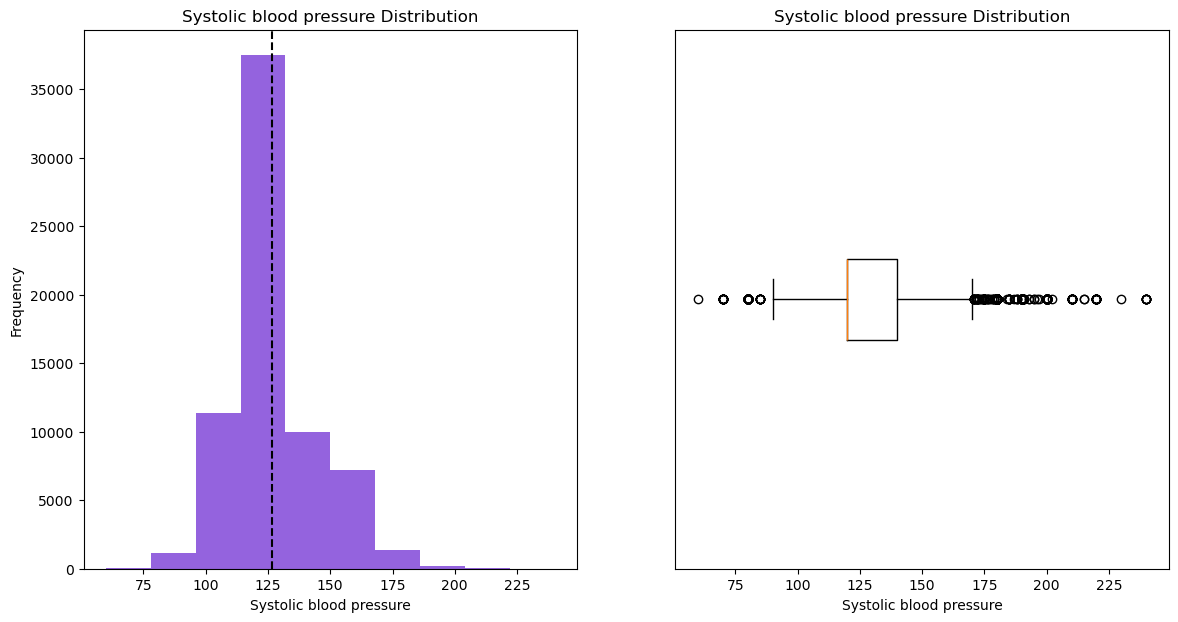

In [58]:
hist_box_plots("Systolic blood pressure")

In [59]:
ap_hi_outliers, ap_hi_lower_bound, ap_hi_higher_bound = find_outliers(analysis_df['Systolic blood pressure'])

print("Lower Bound:", ap_hi_lower_bound)
print("Upper Bound:",  ap_hi_higher_bound)
print("Outlier:", len(ap_hi_outliers))

outliers.update({"Age":len(ap_hi_outliers)})

Lower Bound: 90.0
Upper Bound: 170.0
Outlier: 1069


In [60]:
outliers.update({"Systolic blood pressure": len(ap_hi_outliers)})

In [61]:
outliers

{'Age': 1069, 'BMI': 2028, 'Systolic blood pressure': 1069}

In [62]:
skewness_dist(analysis_df, "Systolic blood pressure")

Skewness of the Systolic blood pressure variable: 0.907
The distribution is right-skewed


<div style=" color:white; background-color: red; padding: 8px;">

Normal systolic blood pressure typically ranges from around 90 to 120 mmHg. 

Readings below this can indicate hypotension (low blood pressure), which can be dangerous if it is very low or persistent.

Readings above this can indicate hypertension (high blood pressure). A hypertensive crisis is usually defined as a systolic reading of 180 mmHg or higher.

</div>

##### ap_lo (Diastolic blood pressure)

<div class = "alert alert-block alert-warning">
Diastolic blood pressure is the pressure in the arteries when the heart is at rest between beats, specifically during the diastolic phase of the cardiac cycle. It represents the lowest pressure in the arteries when the heart muscle is relaxed and filling with blood. In a blood pressure reading, diastolic pressure is the lower number. For example, in a reading of 120/80 mmHg, 80 mmHg represents the diastolic pressure.

Normal diastolic blood pressure ranges from around 60 to 80 mmHg. Readings below this can indicate hypotension, while readings above can indicate hypertension.

</div>

In [63]:
statistical_summary("Diastolic blood pressure")

quantiles("Diastolic blood pressure")

Statistical summary for the variable Diastolic blood pressure: 
count    68795.000000
mean        81.365070
std          9.726854
min         20.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        190.000000
Name: Diastolic blood pressure, dtype: float64

Quantiles for the variable Diastolic blood pressure:
0.00     20.0
0.25     80.0
0.50     80.0
0.75     90.0
0.90     90.0
0.99    110.0
1.00    190.0
Name: Diastolic blood pressure, dtype: float64


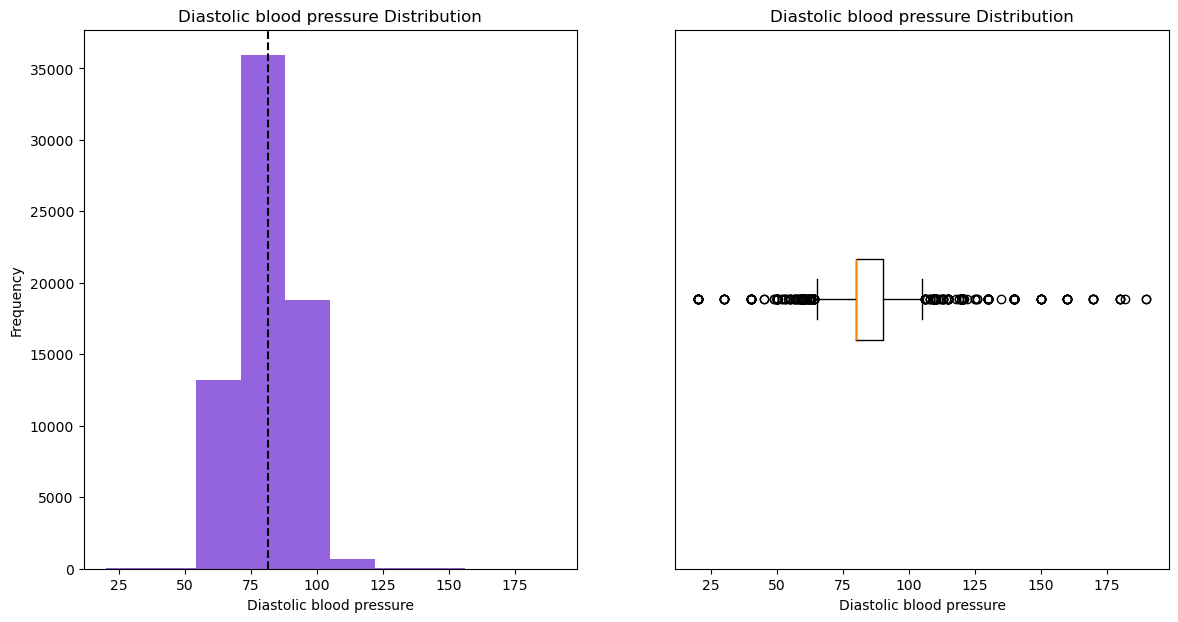

In [64]:
hist_box_plots("Diastolic blood pressure")

In [65]:
ap_lo_outliers, ap_lo_lower_bound, ap_lo_higher_bound = find_outliers(analysis_df['Diastolic blood pressure'])

print("Lower Bound:", ap_lo_lower_bound)
print("Upper Bound:",  ap_lo_higher_bound)
print("Outlier:", len(ap_lo_outliers))

outliers.update({"Age":len(ap_lo_outliers)})

Lower Bound: 65.0
Upper Bound: 105.0
Outlier: 3619


In [66]:
outliers.update({"Diastolic blood pressure":len(ap_lo_outliers)})

In [67]:
outliers

{'Age': 3619,
 'BMI': 2028,
 'Systolic blood pressure': 1069,
 'Diastolic blood pressure': 3619}

In [68]:
skewness_dist(analysis_df, "Diastolic blood pressure")

Skewness of the Diastolic blood pressure variable: 0.583
The distribution is right-skewed


#### Cholesterol 


In [69]:
statistical_summary("Cholesterol")

Statistical summary for the variable Cholesterol: 
count     68795
unique        3
top           1
freq      51593
Name: Cholesterol, dtype: int64



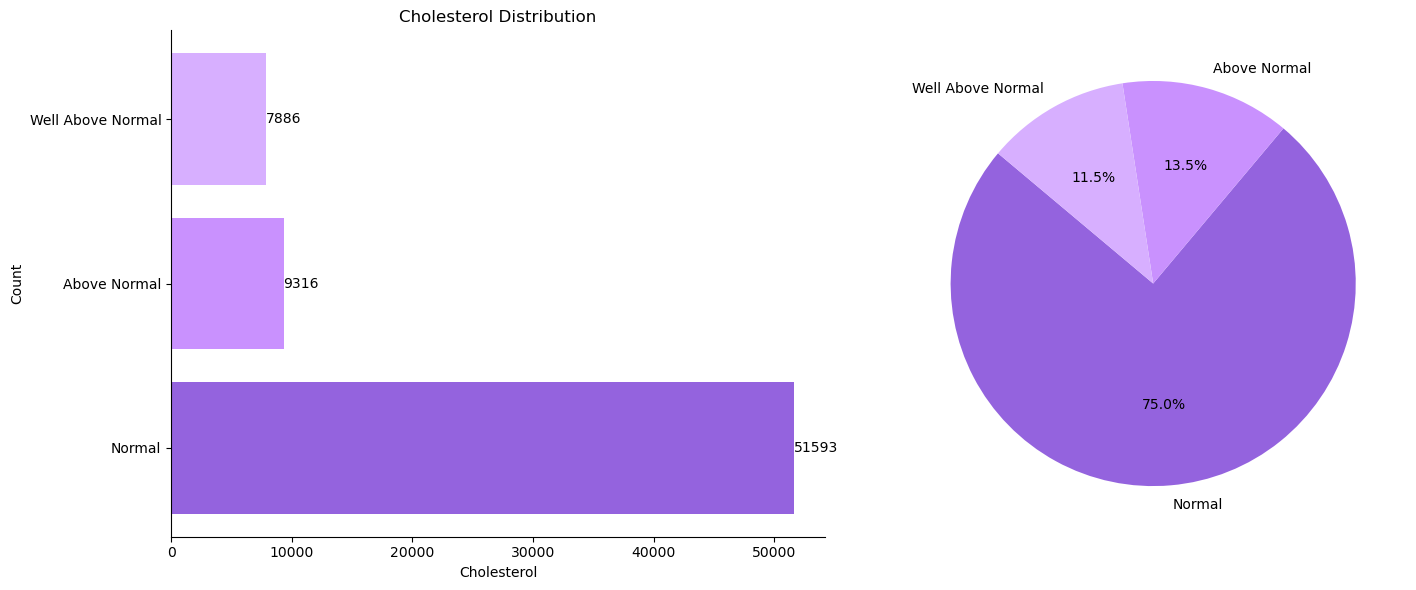

In [70]:
bar_donut_chart("Cholesterol")

#### Glucose 

In [71]:
statistical_summary("Glucose")

Statistical summary for the variable Glucose: 
count     68795
unique        3
top           1
freq      58484
Name: Glucose, dtype: int64



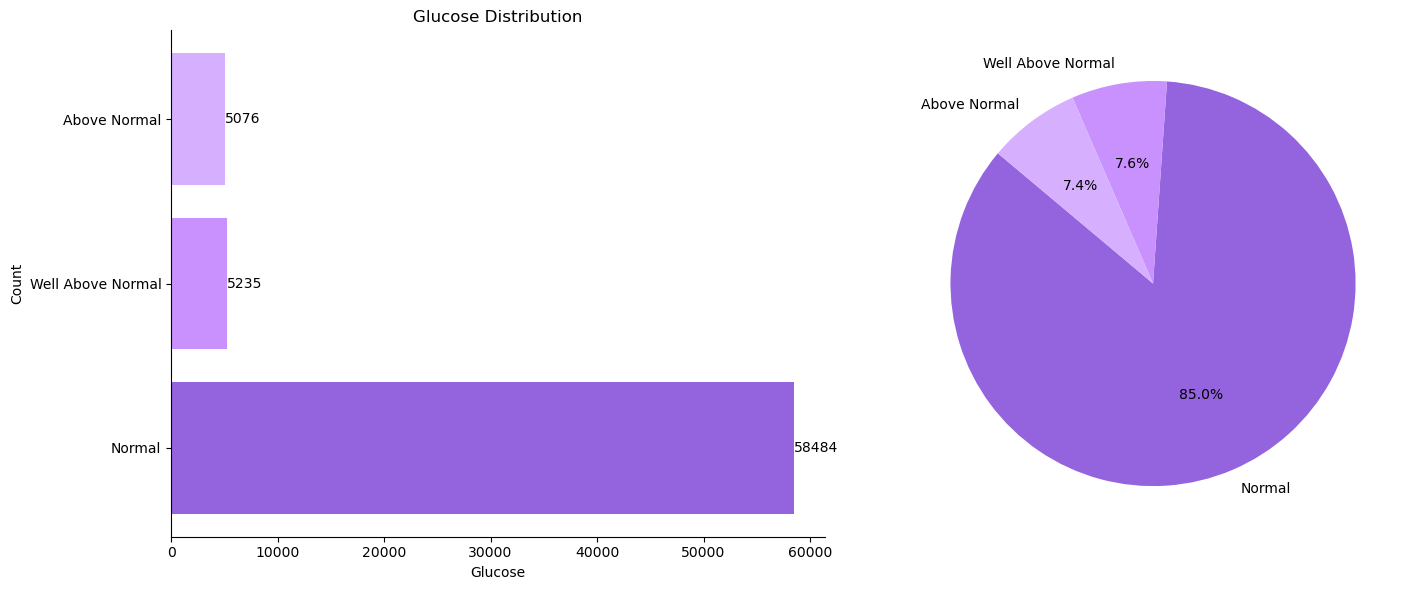

In [72]:
bar_donut_chart("Glucose")

#### Smoke

In [73]:
statistical_summary("Smoke")

Statistical summary for the variable Smoke: 
count     68795
unique        2
top       False
freq      62742
Name: Smoke, dtype: object



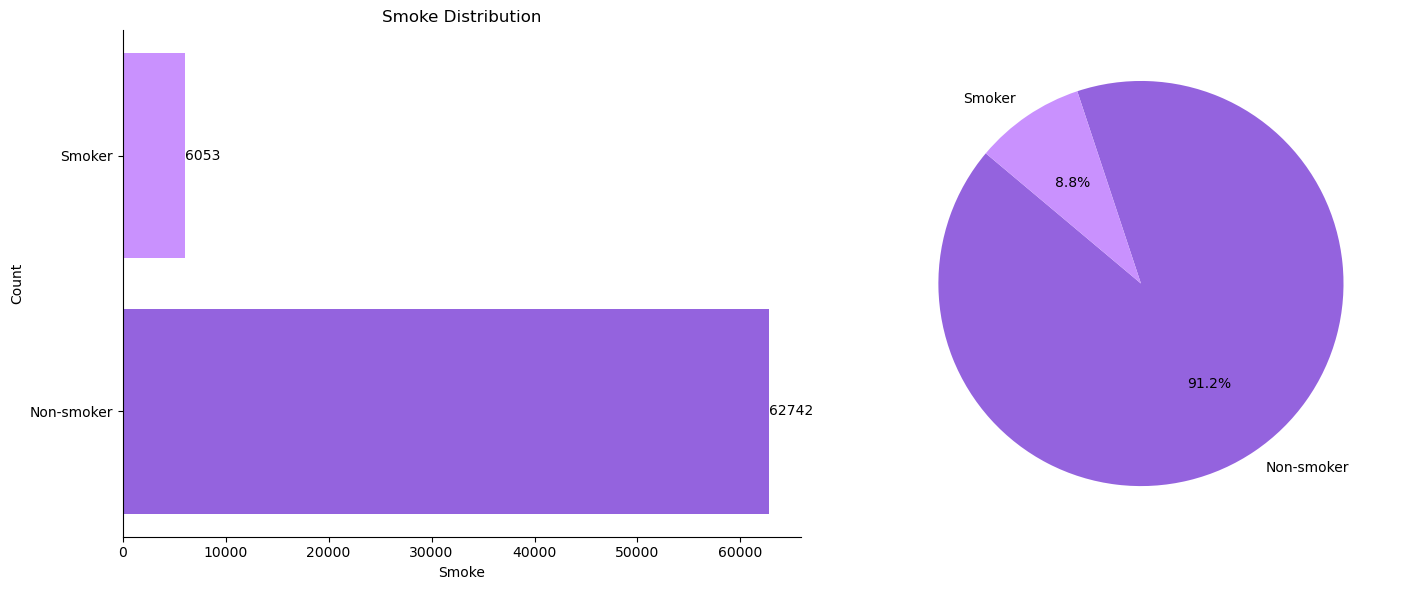

In [74]:
bar_donut_chart("Smoke")

#### Alchol

In [75]:
statistical_summary("Alcohol")

Statistical summary for the variable Alcohol: 
count     68795
unique        2
top       False
freq      65106
Name: Alcohol, dtype: object



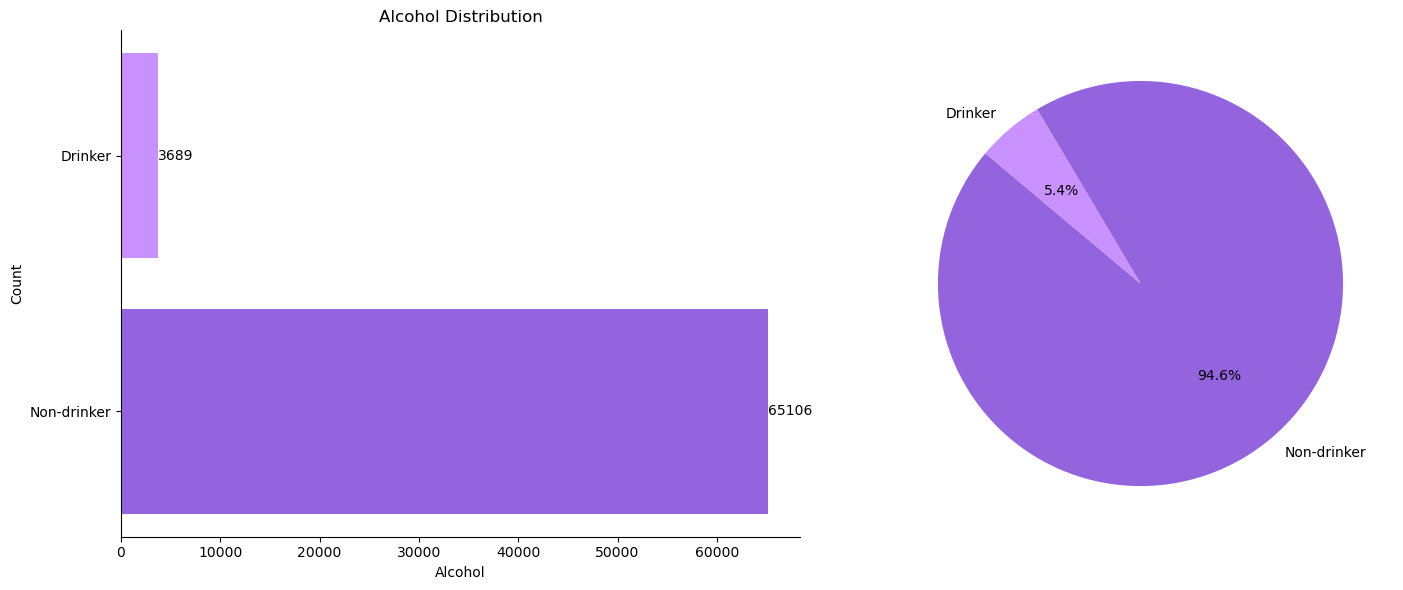

In [76]:
bar_donut_chart("Alcohol")

#### Active

In [77]:
statistical_summary("Physical activity")

Statistical summary for the variable Physical activity: 
count     68795
unique        2
top        True
freq      55269
Name: Physical activity, dtype: object



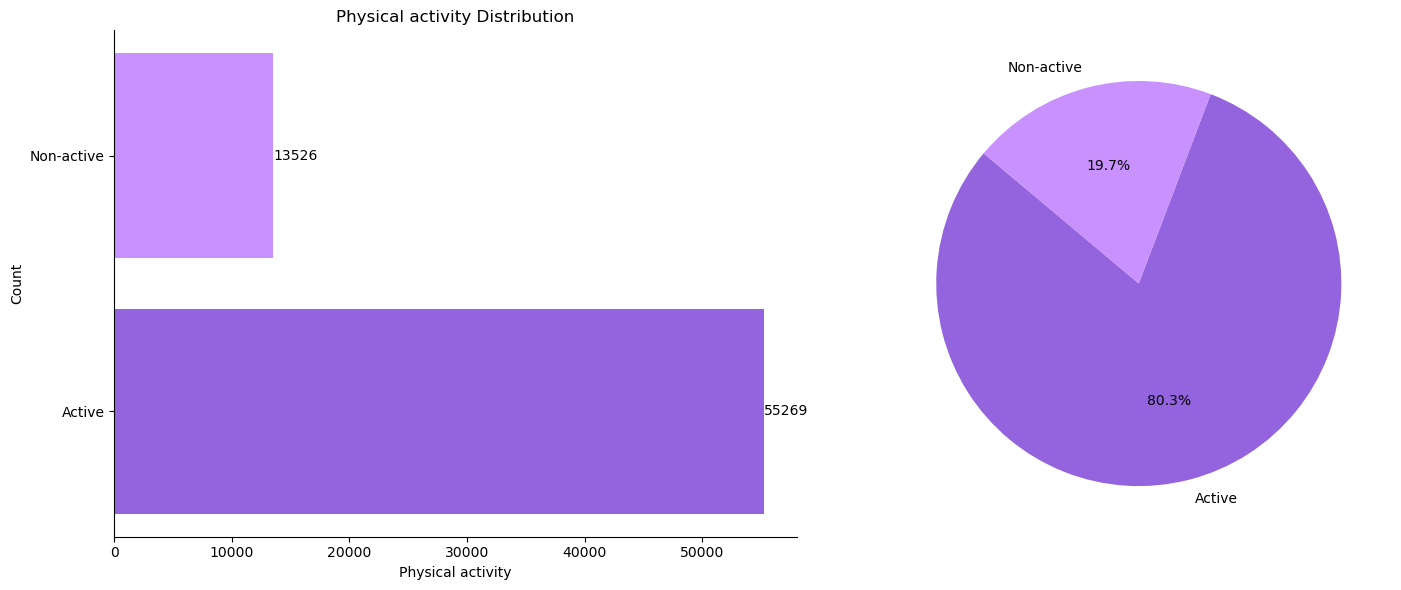

In [78]:
bar_donut_chart("Physical activity")

#### Cardio
0: Presence of cardiovascular disease, 1: Absence of cardiovascular disease 


In [79]:
statistical_summary("Cardiovascular disease")

Statistical summary for the variable Cardiovascular disease: 
count     68795
unique        2
top       False
freq      34747
Name: Cardiovascular disease, dtype: object



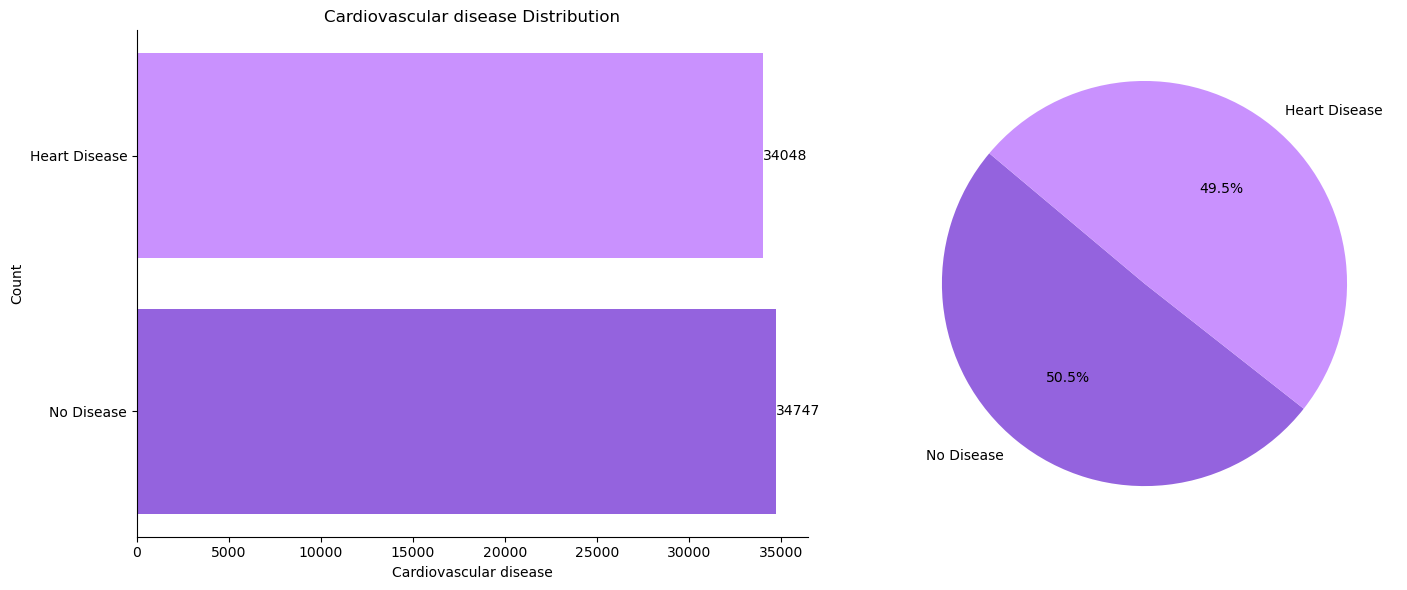

In [80]:
bar_donut_chart("Cardiovascular disease")

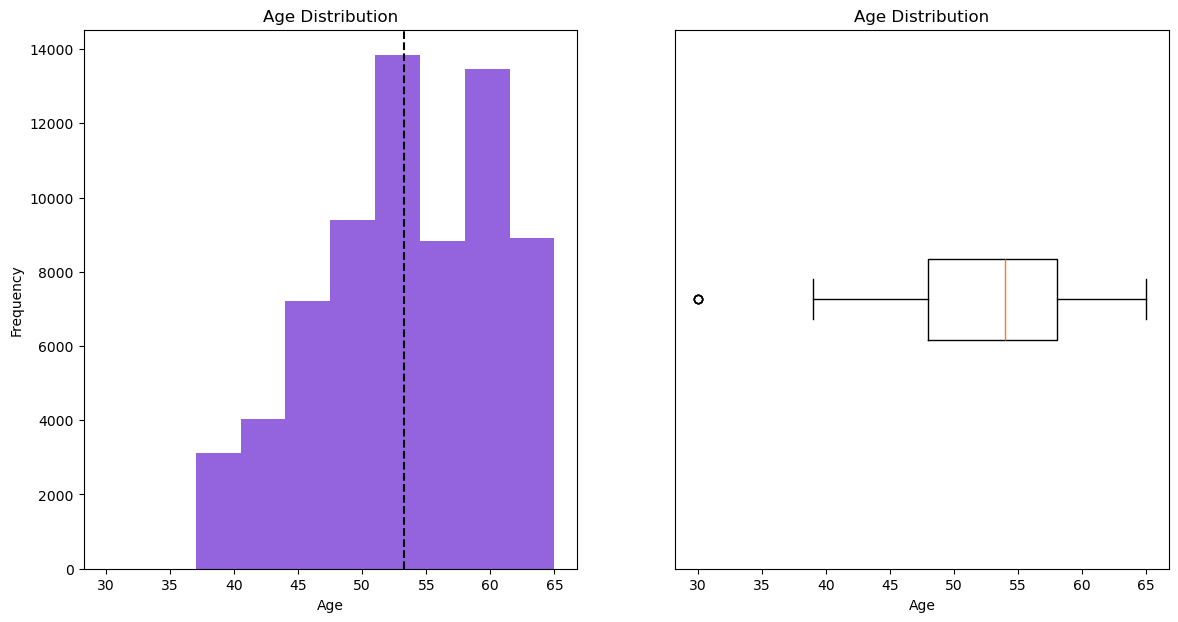

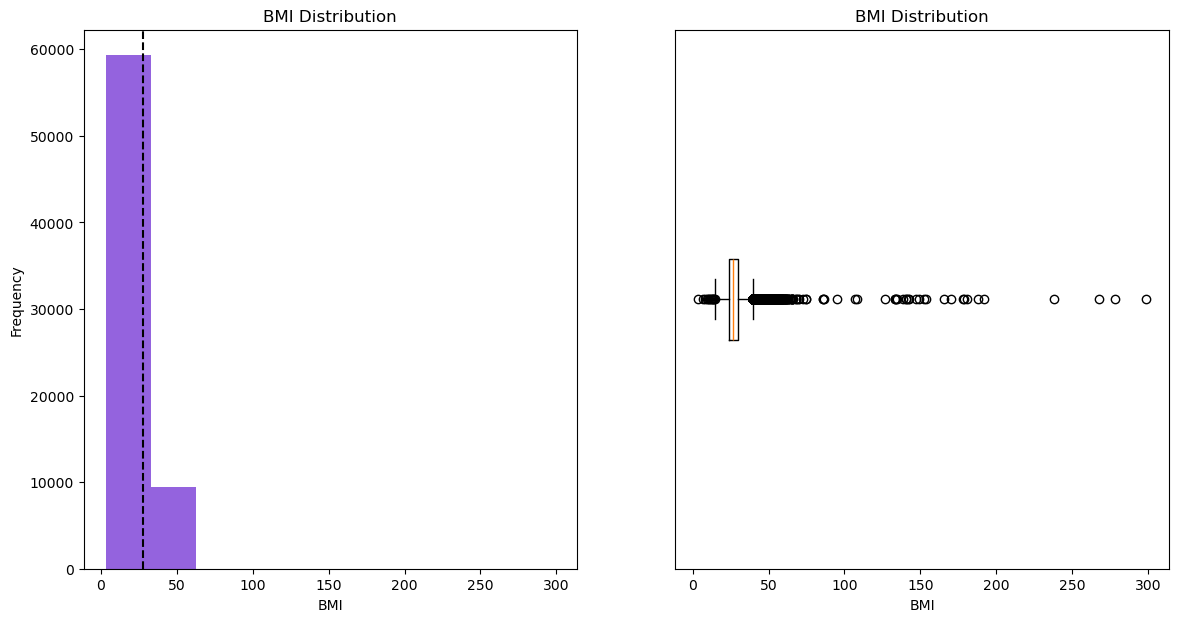

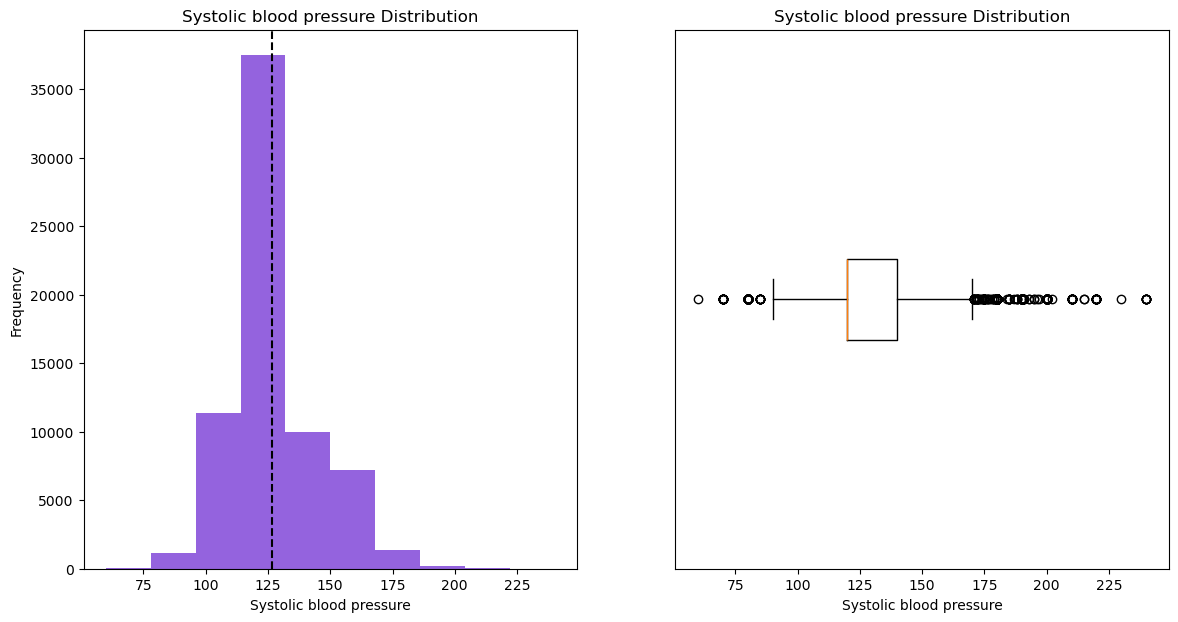

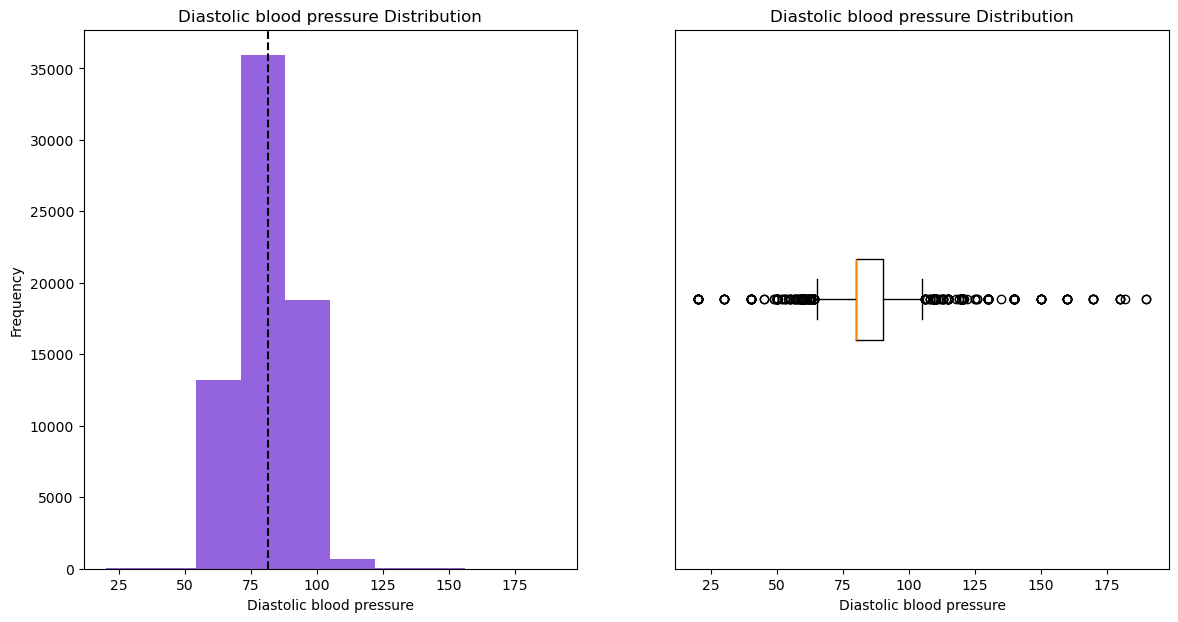

In [81]:
features = ["Age", "BMI", "Systolic blood pressure", "Diastolic blood pressure"]

for i in features:
    hist_box_plots(i)



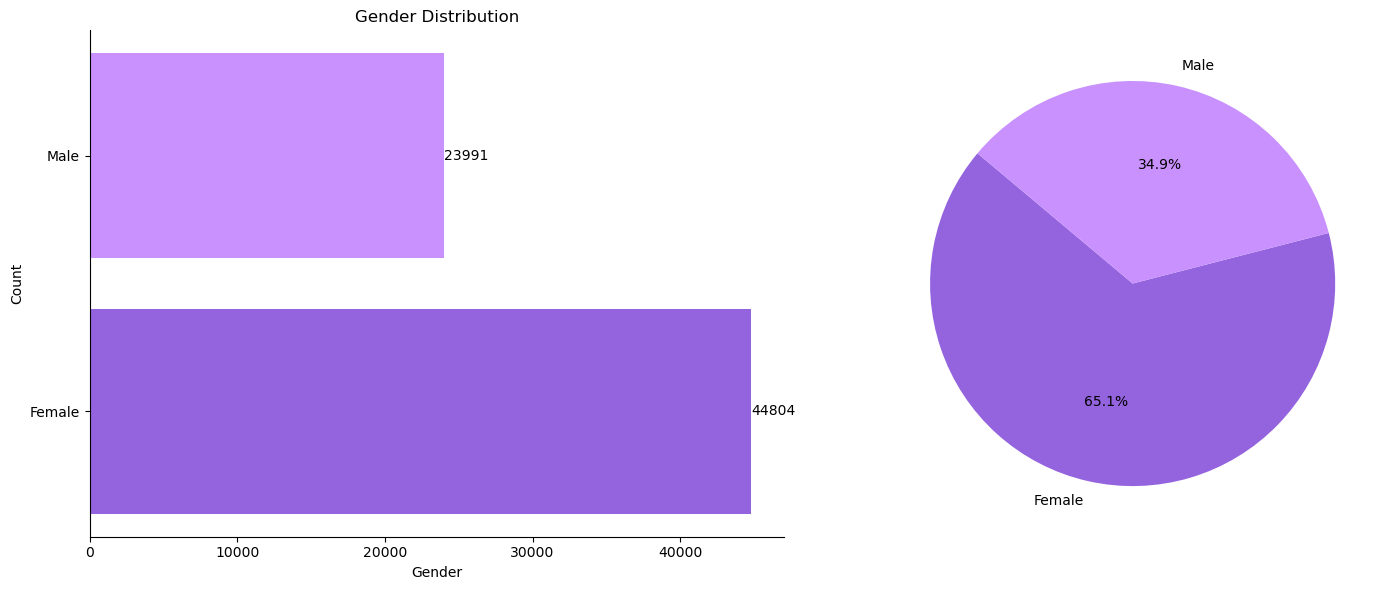

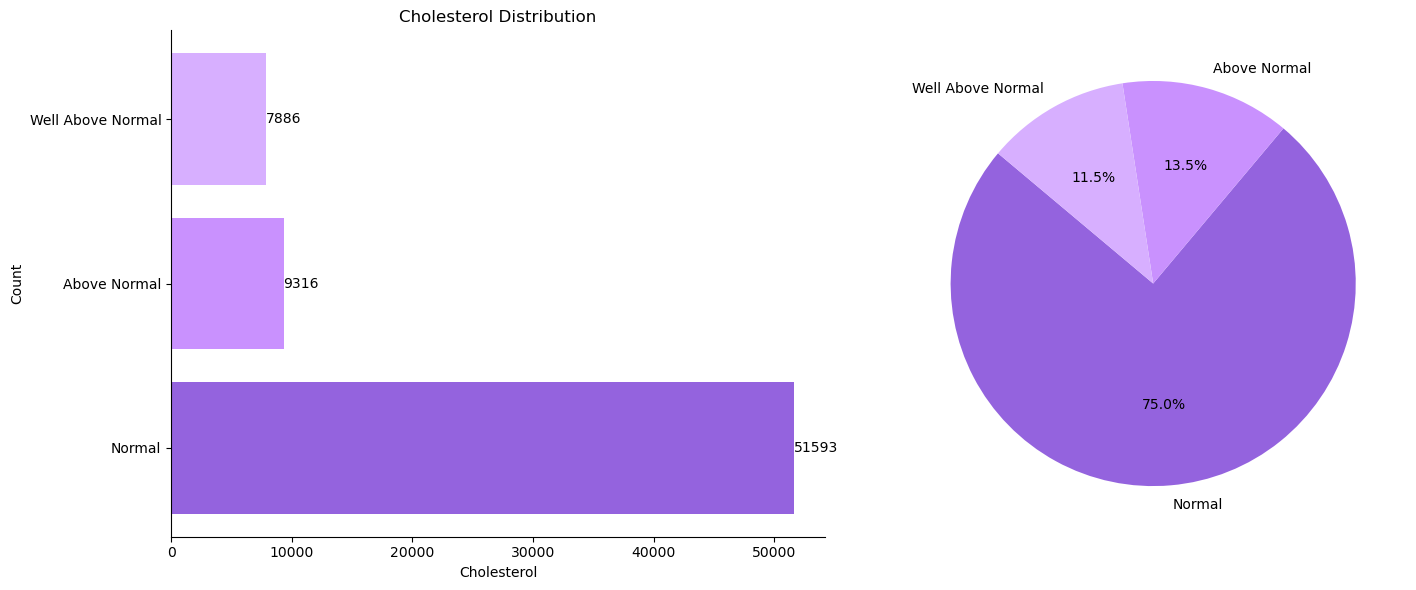

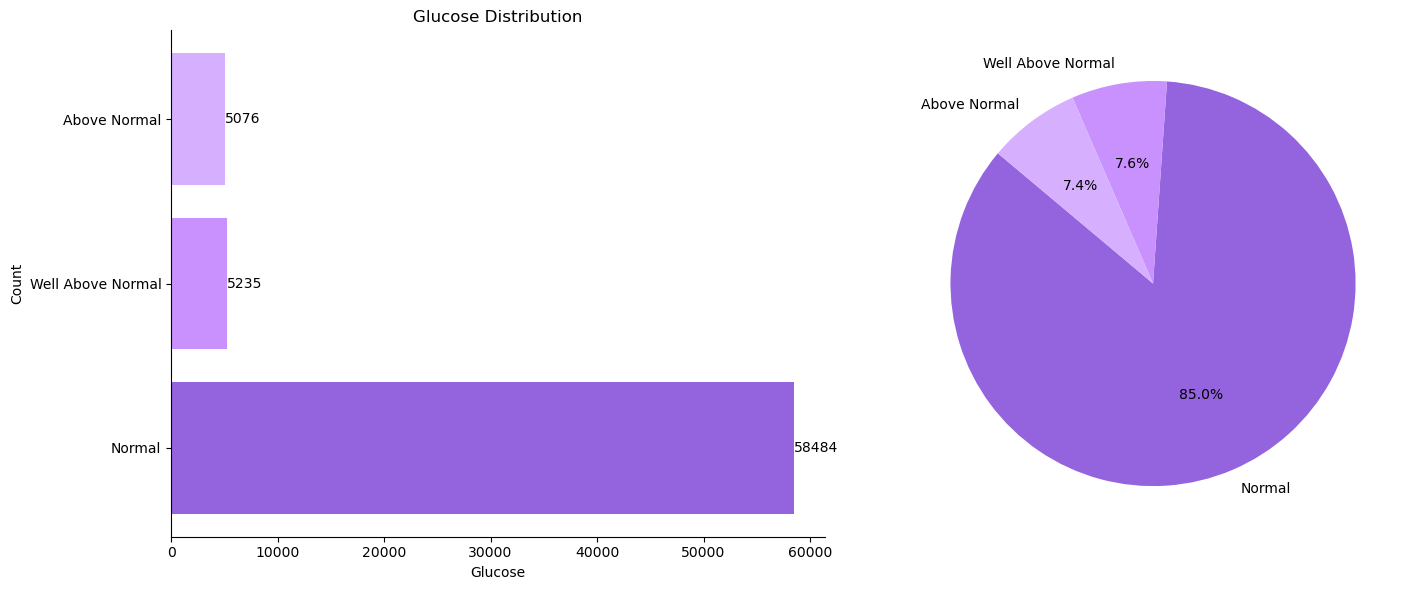

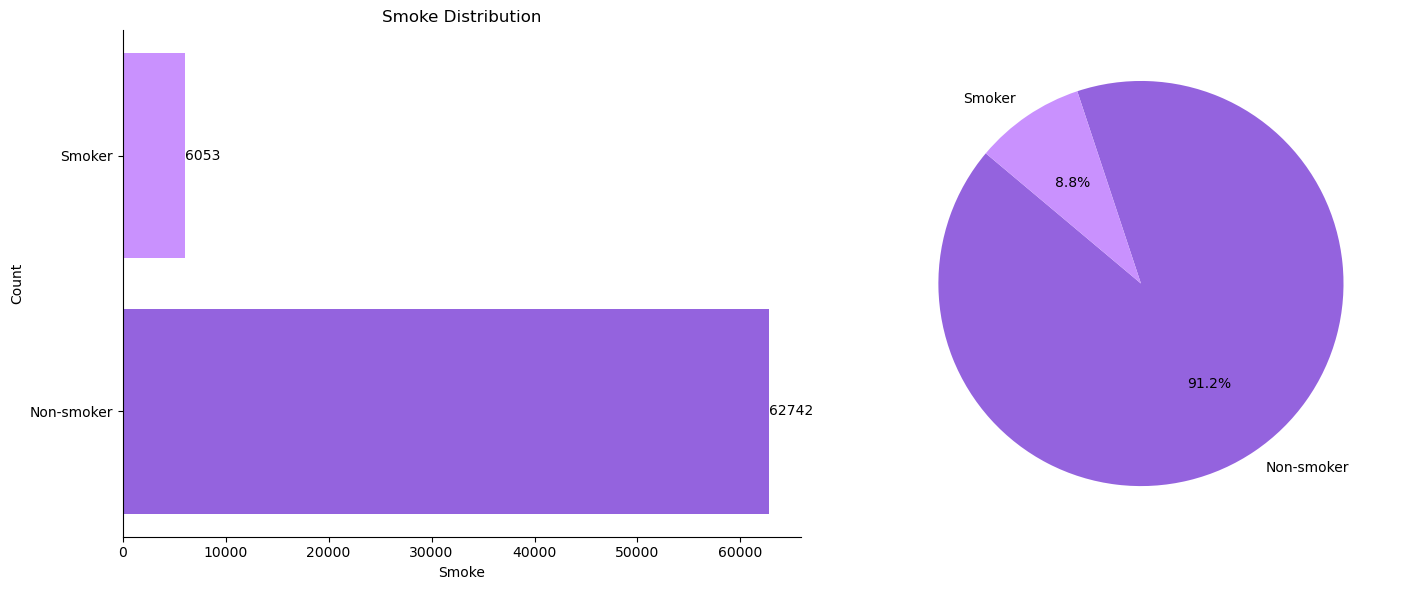

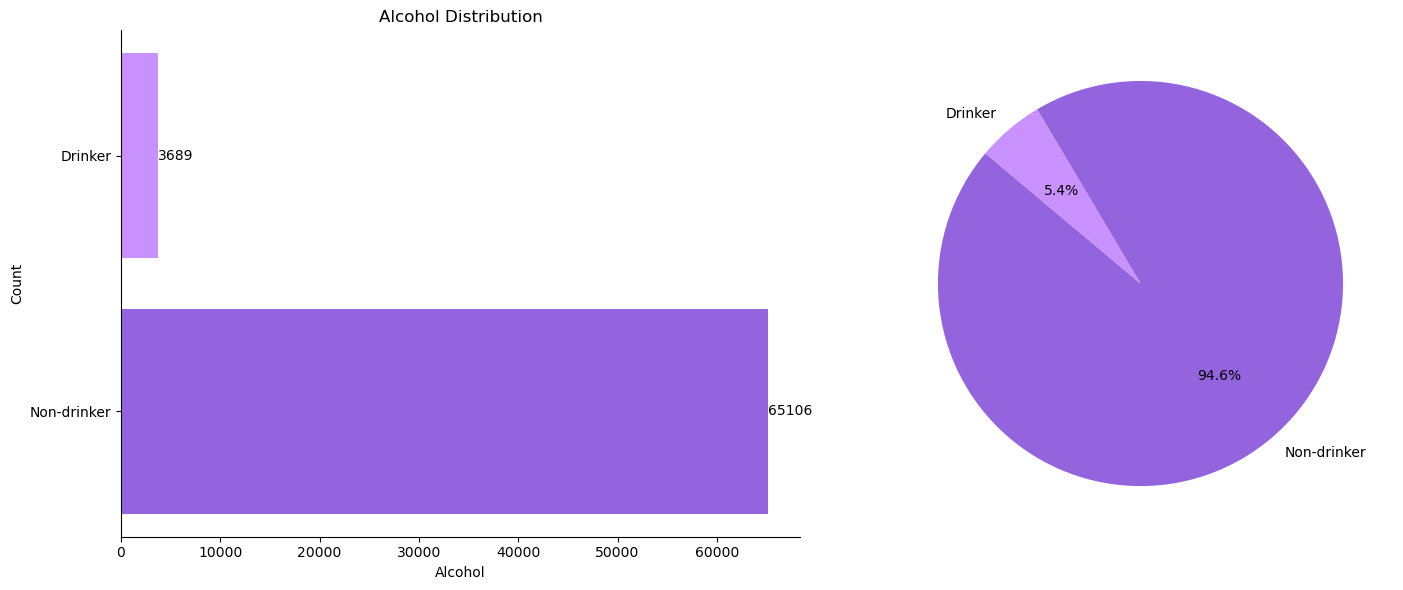

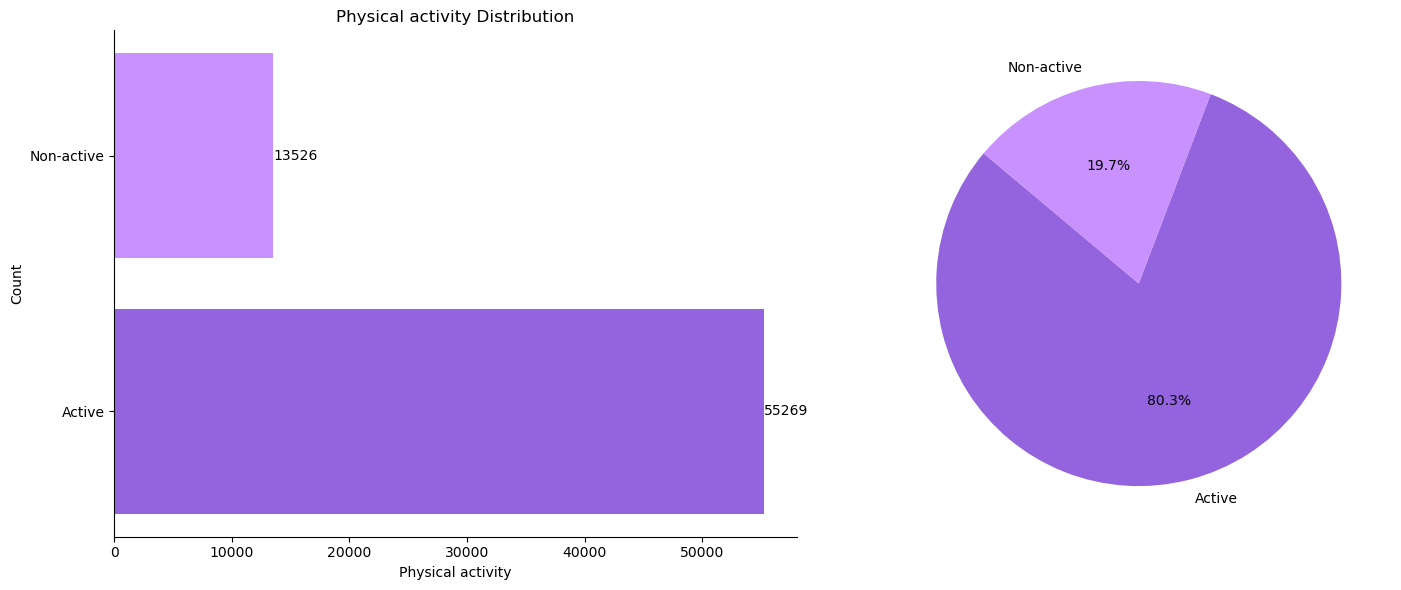

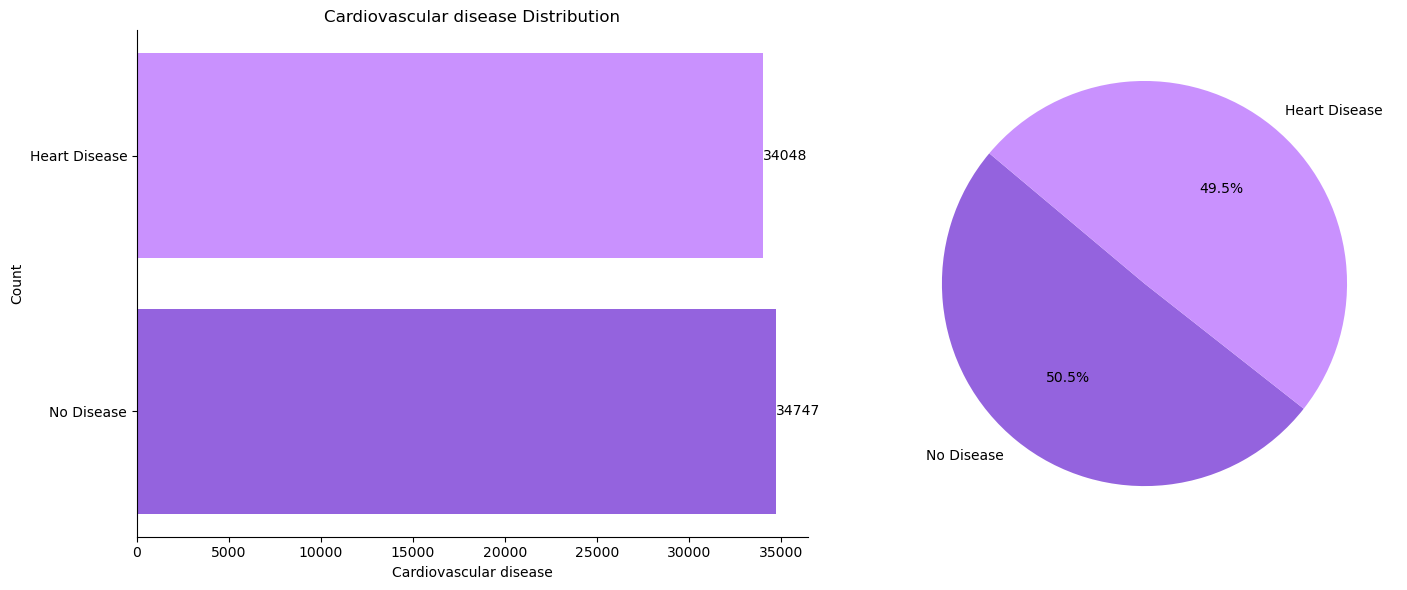

In [82]:
features = ["Gender", "Cholesterol", "Glucose", "Smoke","Alcohol", "Physical activity", "Cardiovascular disease"]

for i in features:
    bar_donut_chart(i)

### Bivariate Analysis

In [83]:
corr_matrix = heart_df.corr()
corr_matrix

,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
Age,1.000000,-0.023311,0.086607,0.208492,0.151989,0.155443,0.098846,-0.048079,-0.029172,-0.010358,0.239128
Gender,-0.023311,1.000000,-0.096614,0.061233,0.066199,-0.036703,-0.021193,0.338755,0.171078,0.005828,0.007283
BMI,0.086607,-0.096614,1.000000,0.231760,0.205704,0.146398,0.101818,-0.027959,0.015077,-0.014345,0.164352
Systolic blood pressure,0.208492,0.061233,0.231760,1.000000,0.694381,0.193962,0.092542,0.027048,0.032497,-0.001288,0.425081
Diastolic blood pressure,0.151989,0.066199,0.205704,0.694381,1.000000,0.158304,0.076216,0.025102,0.043719,0.000067,0.333050
Cholesterol,0.155443,-0.036703,0.146398,0.193962,0.158304,1.000000,0.451303,0.009871,0.035707,0.008976,0.221453
Glucose,0.098846,-0.021193,0.101818,0.092542,0.076216,0.451303,1.000000,-0.005727,0.011212,-0.007511,0.090077
Smoke,-0.048079,0.338755,-0.027959,0.027048,0.025102,0.009871,-0.005727,1.000000,0.339953,0.025448,-0.016293
Alcohol,-0.029172,0.171078,0.015077,0.032497,0.043719,0.035707,0.011212,0.339953,1.000000,0.025052,-0.008229
Physical activity,-0.010358,0.005828,-0.014345,-0.001288,0.000067,0.008976,-0.007511,0.025448,0.025052,1.000000,-0.037141


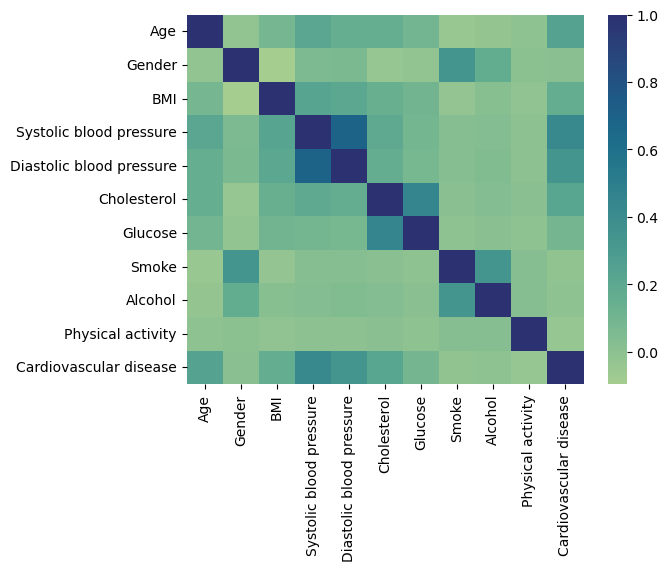

In [84]:
# this is a high level of what the correlation of each variable with each other looks like. 

ax = sns.heatmap(corr_matrix, cmap="crest")




This doesn't tell us much, what I am really interested is understanding what are the causes of cardiovascular diseaes. That is why I will look at each of the independent variables relationship to my target variable. 

In [85]:
dependent_corr = corr_matrix["Cardiovascular disease"]
dependent_corr

Age                         0.239128
Gender                      0.007283
BMI                         0.164352
Systolic blood pressure     0.425081
Diastolic blood pressure    0.333050
Cholesterol                 0.221453
Glucose                     0.090077
Smoke                      -0.016293
Alcohol                    -0.008229
Physical activity          -0.037141
Cardiovascular disease      1.000000
Name: Cardiovascular disease, dtype: float64

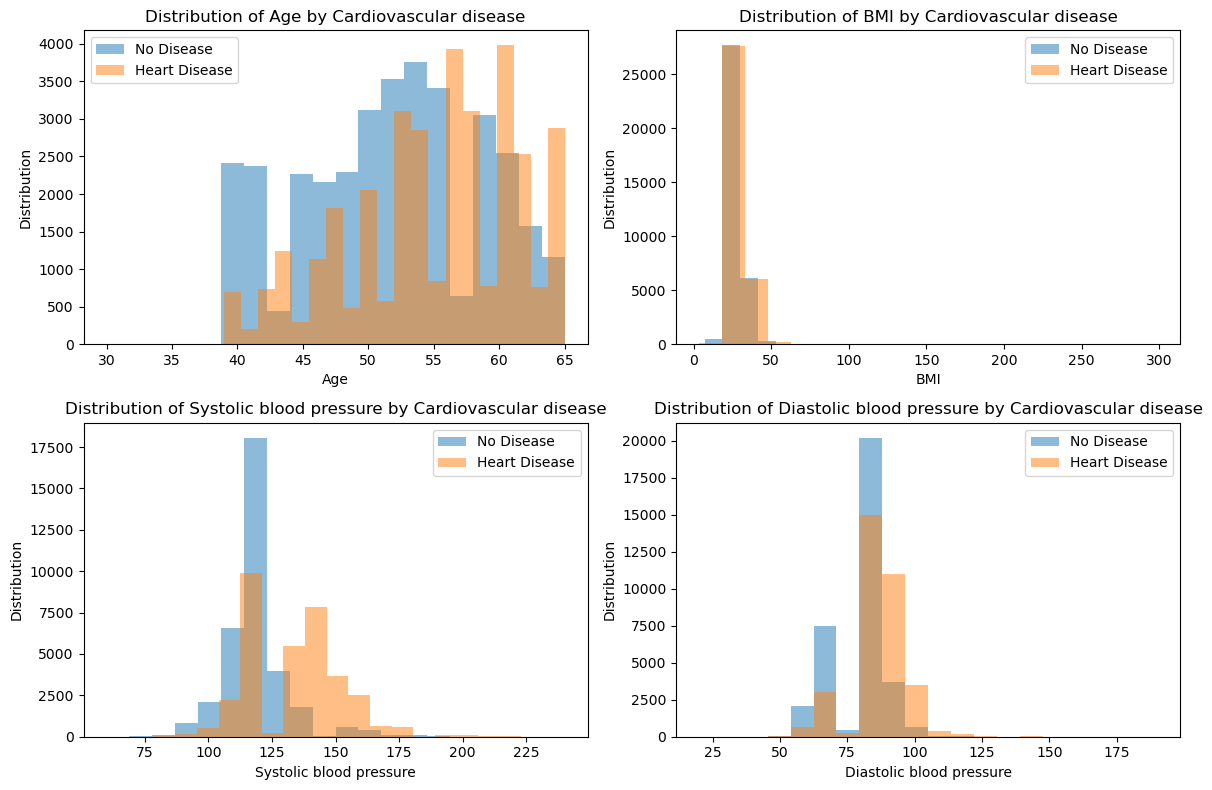

In [86]:
# numerical analysis with outliers 

numerical_features = ["Age", "BMI", "Systolic blood pressure", "Diastolic blood pressure"]

fig, axex = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    ax = axex[row, col]

    ax.hist(heart_df[heart_df["Cardiovascular disease"] == 0][feature], bins=20, alpha=0.5, label="No Disease")
    ax.hist(heart_df[heart_df["Cardiovascular disease"] == 1][feature], bins=20, alpha=0.5, label="Heart Disease")
    ax.set_title(f"Distribution of {feature} by Cardiovascular disease")
    ax.set_xlabel(feature)
    ax.set_ylabel("Distribution")
    ax.legend()

plt.tight_layout()
plt.show()



In [87]:
heart_df

,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,50,2,21.97,110,80,1,1,False,False,True,False
1,55,1,34.93,140,90,3,1,False,False,True,True
2,52,1,23.51,130,70,3,1,False,False,False,True
3,48,2,28.71,150,100,1,1,False,False,True,True
4,48,1,23.01,100,60,1,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,26.93,120,80,1,1,True,False,True,False
69996,62,1,50.47,140,90,2,2,False,False,True,True
69997,52,2,31.35,180,90,3,1,False,True,False,True
69998,61,1,27.10,135,80,1,2,False,False,False,True


In [88]:
analysis_df

,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,50,Male,21.97,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No Disease
1,55,Female,34.93,140,90,Well Above Normal,Normal,Non-smoker,Non-drinker,Active,Heart Disease
2,52,Female,23.51,130,70,Well Above Normal,Normal,Non-smoker,Non-drinker,Non-active,Heart Disease
3,48,Male,28.71,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,Heart Disease
4,48,Female,23.01,100,60,Normal,Normal,Non-smoker,Non-drinker,Non-active,No Disease
...,...,...,...,...,...,...,...,...,...,...,...
69995,53,Male,26.93,120,80,Normal,Normal,Smoker,Non-drinker,Active,No Disease
69996,62,Female,50.47,140,90,Above Normal,Above Normal,Non-smoker,Non-drinker,Active,Heart Disease
69997,52,Male,31.35,180,90,Well Above Normal,Normal,Non-smoker,Drinker,Non-active,Heart Disease
69998,61,Female,27.10,135,80,Normal,Above Normal,Non-smoker,Non-drinker,Non-active,Heart Disease


In [89]:
outliers

{'Age': 3619,
 'BMI': 2028,
 'Systolic blood pressure': 1069,
 'Diastolic blood pressure': 3619}

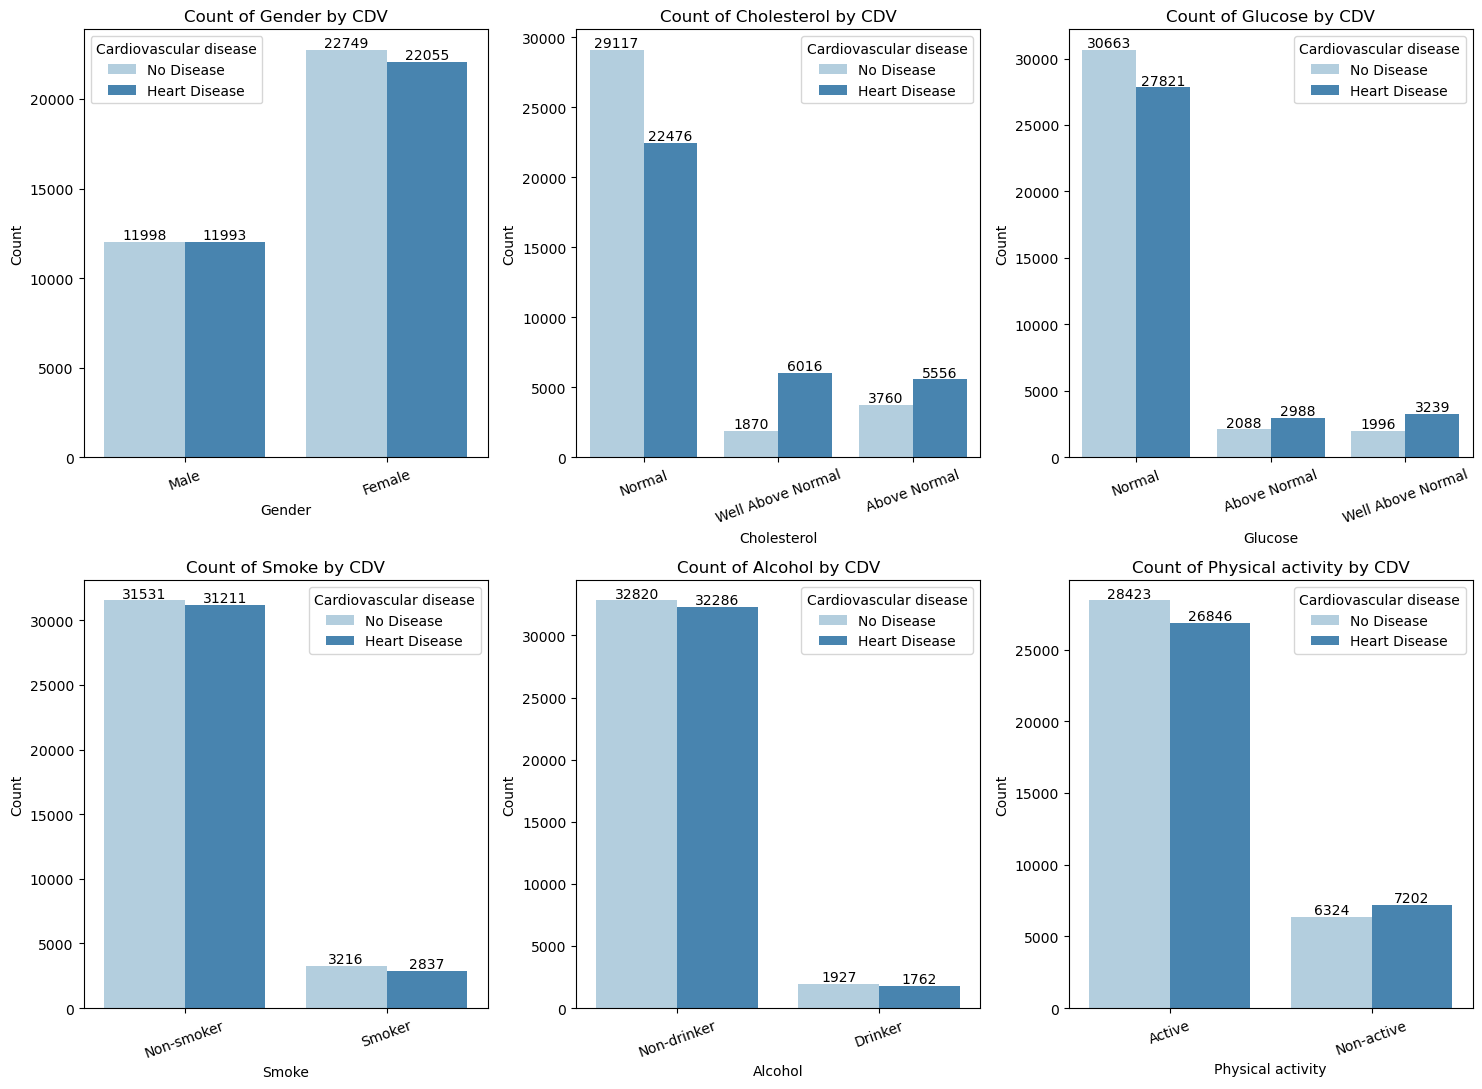

In [90]:
# Binary and Categorical Varible 

categorical_features = ["Gender", "Cholesterol", "Glucose", "Smoke", "Alcohol", "Physical activity"]

num_features = len(categorical_features)
num_rows = (num_features -1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,11))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]


    sns.countplot(data=analysis_df, x=feature, hue="Cardiovascular disease", ax=ax, palette='Blues')
    ax.set_title(f"Count of {feature} by CDV")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation = 20)
    
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha="center", va="center",
                        xytext=(0, 5),
                        textcoords='offset points',
                        color='black')


for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()


One way of thought would be that the outliers are incorrectly entered and need to be removed

Remove any outliers 

In [91]:

bmi_outliers_list = bmi_outliers.tolist()
ap_hi_outliers_list = ap_hi_outliers.tolist()
ap_lo_outliers_list = ap_lo_outliers.tolist()



In [92]:
heart_df = heart_df[heart_df["BMI"].apply(lambda x: x not in bmi_outliers_list)]
heart_df = heart_df[heart_df["Systolic blood pressure"].apply(lambda x: x not in ap_hi_outliers_list)]
heart_df = heart_df[heart_df["Diastolic blood pressure"].apply(lambda x: x not in ap_lo_outliers_list)]



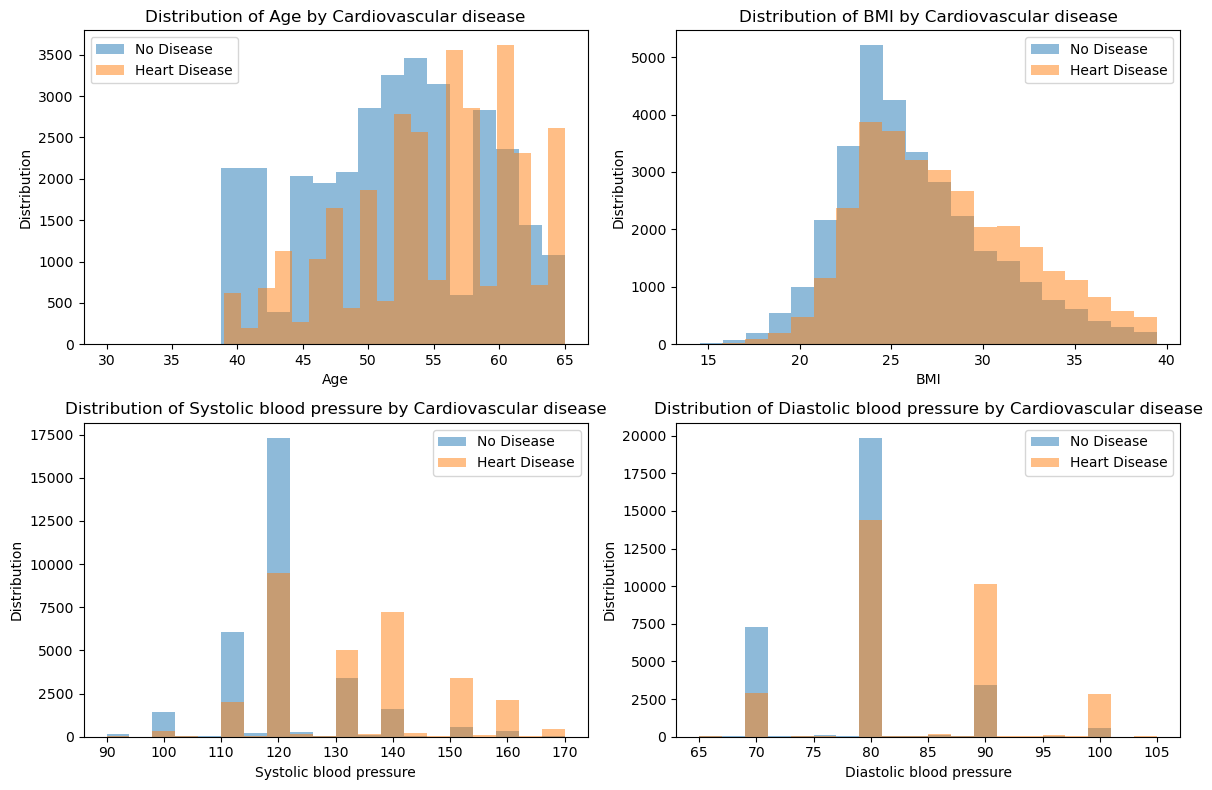

In [93]:
numerical_features = ["Age", "BMI", "Systolic blood pressure", "Diastolic blood pressure"]

fig, axex = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    ax = axex[row, col]

    ax.hist(heart_df[heart_df["Cardiovascular disease"] == 0][feature], bins=20, alpha=0.5, label="No Disease")
    ax.hist(heart_df[heart_df["Cardiovascular disease"] == 1][feature], bins=20, alpha=0.5, label="Heart Disease")
    ax.set_title(f"Distribution of {feature} by Cardiovascular disease")
    ax.set_xlabel(feature)
    ax.set_ylabel("Distribution")
    ax.legend()

plt.tight_layout()
plt.show()

In [94]:
analysis_df = analysis_df[analysis_df["BMI"].apply(lambda x: x not in bmi_outliers_list)]
analysis_df = analysis_df[analysis_df["Systolic blood pressure"].apply(lambda x: x not in ap_hi_outliers_list)]
analysis_df = analysis_df[analysis_df["Diastolic blood pressure"].apply(lambda x: x not in ap_lo_outliers_list)]
analysis_df


,Age,Gender,BMI,Systolic blood pressure,Diastolic blood pressure,Cholesterol,Glucose,Smoke,Alcohol,Physical activity,Cardiovascular disease
0,50,Male,21.97,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No Disease
1,55,Female,34.93,140,90,Well Above Normal,Normal,Non-smoker,Non-drinker,Active,Heart Disease
2,52,Female,23.51,130,70,Well Above Normal,Normal,Non-smoker,Non-drinker,Non-active,Heart Disease
3,48,Male,28.71,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,Heart Disease
5,60,Female,29.38,120,80,Above Normal,Above Normal,Non-smoker,Non-drinker,Non-active,No Disease
...,...,...,...,...,...,...,...,...,...,...,...
69993,54,Female,23.66,130,90,Normal,Normal,Non-smoker,Non-drinker,Active,Heart Disease
69994,58,Female,29.38,150,80,Normal,Normal,Non-smoker,Non-drinker,Active,Heart Disease
69995,53,Male,26.93,120,80,Normal,Normal,Smoker,Non-drinker,Active,No Disease
69998,61,Female,27.10,135,80,Normal,Above Normal,Non-smoker,Non-drinker,Non-active,Heart Disease


In [95]:
len(analysis_df["Glucose"])

62645

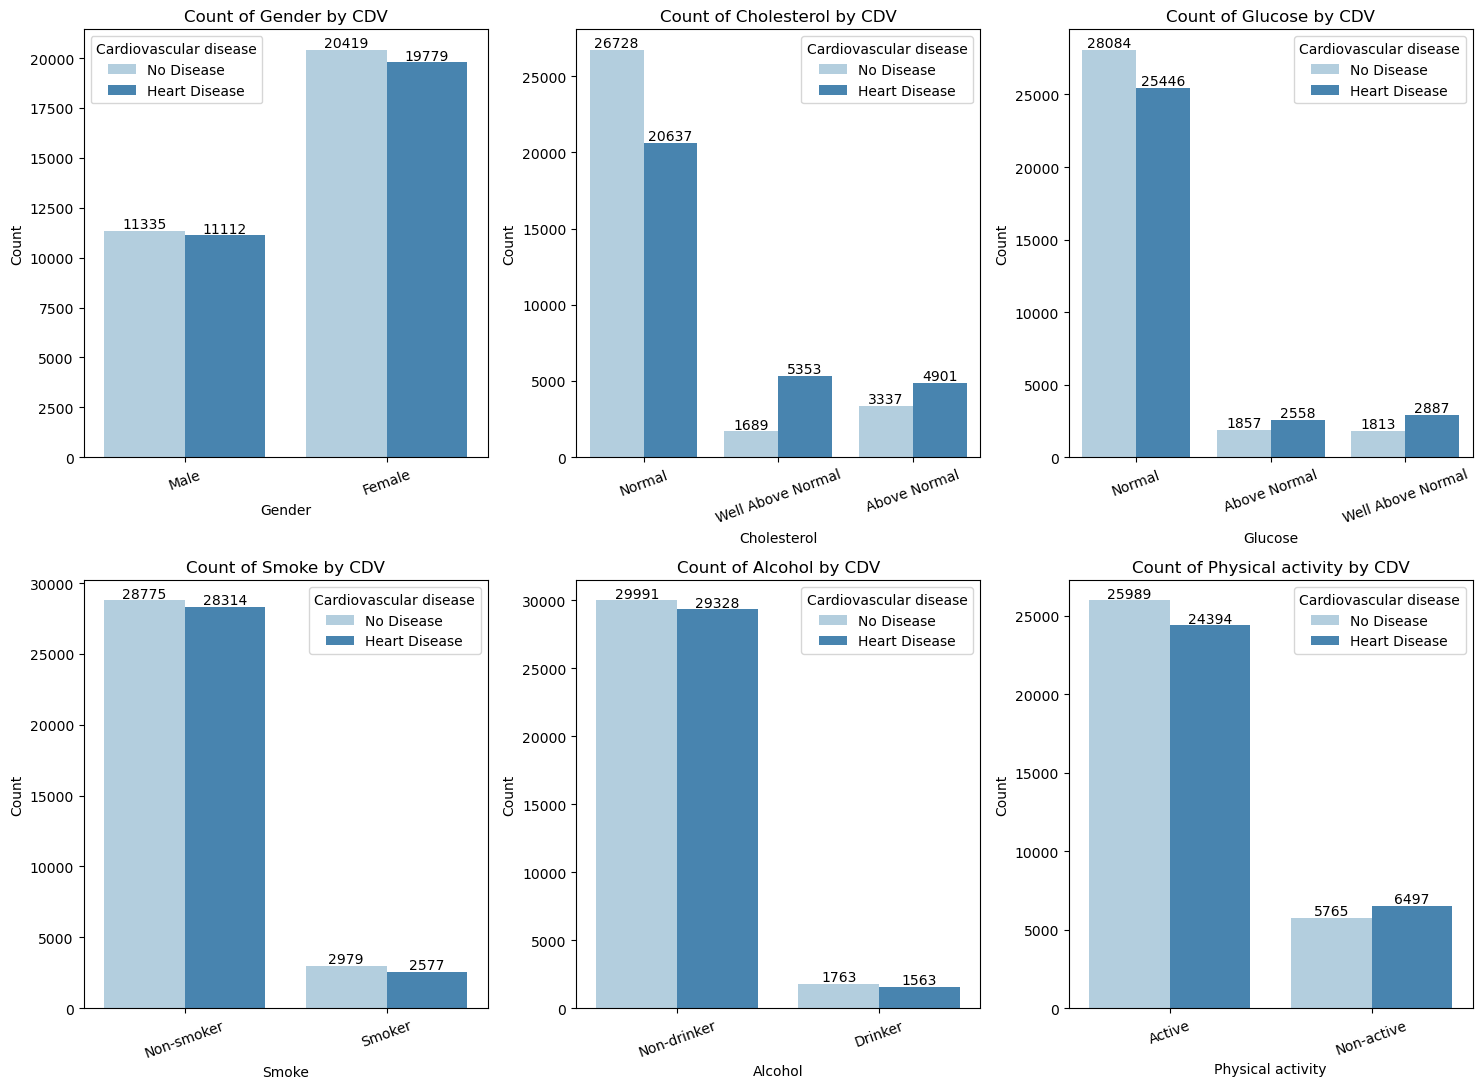

In [96]:
# Binary and Categorical Varible 

categorical_features = ["Gender", "Cholesterol", "Glucose", "Smoke", "Alcohol", "Physical activity"]

num_features = len(categorical_features)
num_rows = (num_features -1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,11))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]


    sns.countplot(data=analysis_df, x=feature, hue="Cardiovascular disease", ax=ax, palette='Blues')
    ax.set_title(f"Count of {feature} by CDV")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation = 20)
    
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha="center", va="center",
                        xytext=(0, 5),
                        textcoords='offset points',
                        color='black')


for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()